In [1]:
from class_fit_bazin_function import * 
# from class_fit_brokenPL import * 
from class_fit_brokenPL_iminuit2 import * 
# from class_fit_simpleEXPlaw import *
from class_fit_simpleEXPlaw_iminuit2 import *
from class_separated_fp_explotimin import *
from scipy import integrate
import pandas as pd
from scipy.stats import pearsonr
import os
import glob
from astropy.constants import c,h,k_B

from functions_4_gp import *



from astropy.modeling.models import BlackBody1D
from astropy.modeling.blackbody import FLAM
from astropy import units as u
from astropy.visualization import quantity_support

In [2]:
%matplotlib notebook

In [3]:
from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18



In [4]:
save_forcedphot  = '/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/forced_photometry/sample422/lc/'


In [5]:
peaks_andall  = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/peak_mag/peak_mag_fulinfantsample_01022022.ascii', delimiter=',')

# table_infants = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/tables/RISNeIIfull_radeczeztexpflashpeak_24012022.csv', delimiter = ',')

table_infants = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/tables/RISNeIIfull_radeczeztexpflashpeakclimb_15022022.csv', delimiter = ',')

declinaison      = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/decline_linear_fit/result_fit_declinelinear_26012022.ascii', delimiter = ',')

standard_SNII = table_infants[(table_infants['rach-classification']=='SN II')]

In [6]:
standard_SNII

<Table length=125>
    name     rach-classification ...    climb_time_r       climb_time_g   
   str12            str10        ...      float64            float64      
------------ ------------------- ... ------------------ ------------------
ZTF18aaaibml               SN II ...               99.0               99.0
ZTF18aadsuxd               SN II ... 12.239580380239499 11.894827269608745
ZTF18aahrzrb               SN II ...               99.0               99.0
ZTF18aapifti               SN II ...               99.0               99.0
ZTF18aaqkoyr               SN II ... 11.335448812451904  5.654246023831865
ZTF18aarpttw               SN II ...               99.0               99.0
ZTF18aatlfus               SN II ...               99.0               99.0
ZTF18aavpady               SN II ...               99.0               99.0
ZTF18aawyjjq               SN II ... 12.449238553672593   6.98778880160494
ZTF18aaxwrjt               SN II ...  10.76987532403197 3.9398018496704883
         ...                 ... ...                ...                ...
ZTF20acjbhhp               SN II ... 11.579427903415066   7.61653183696249
ZTF20acknpig               SN II ... 10.535050459671766  4.479537849205437
ZTF20aclvtnk               SN II ...               99.0               99.0
ZTF20acocohy               SN II ...  7.143701459157623  4.751203091675742
ZTF20acongti               SN II ...  7.350117160997878  4.966270907656164
ZTF20acpevli               SN II ...  7.993407992204209  6.140305359464687
ZTF20acqexmr               SN II ...  6.458614329958019 2.6004353538892038
ZTF20actawpa               SN II ...  7.979719723592064   5.62834337173921
ZTF20acuaqlf               SN II ...  14.51984531190703  5.803853781945589
ZTF20acwgxhk               SN II ...  8.060058562905883  5.265887955346754

In [7]:
interp_early_time_info = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/early_lc_fit/summary_full/interpolation_both_bands_24012022.ascii'
                                   , delimiter = ',')

In [9]:
# LC definition test subject

candiname = 'ZTF20ablygyy'

### IMPORTANT NOTE: 

I am adding manually the peak values found in the photometry in order to also compute the value of the color at peak

In [17]:
def generate_LC(candiname, filt, peak=0):
    '''
    This function generates the LC 

    parameters
    ----------
    candiname [string] 
    filt      [string]
    '''
    la_force_ohoto = save_forcedphot  +  f'{candiname}_fp.ascii'
    
    _filt = f'ZTF_{filt}'

    band         = ForcedPhot(la_force_ohoto, _filt , candiname )
    band.correct_lc(correct_unc = True, correct_z = True, correct_ext = True, add_jd_f_texp= True)
    band.add_magnitudes_detvndet_meas()
    band.table   = band.table[(band.table['mag'] <= 21.)|(band.table['mag'] >= 99.)] 
#     band.plot_maglc()
    photable = band.table['tfromexplo_zc','extcorrforcediffimflux','extcorrforcediffimfluxunc','mag','emag','absmag','e_absmag']
#     photable.add_row([peak['pday'][0], peak['pflux'][0], 1e-12,peak['papmag'][0],1e-6 ,peak['pabmag'][0], peak['e_pabmag'][0]])
    photable.sort('tfromexplo_zc')

    detec    = photable[photable['mag']!=99.0]
    detec    = detec[(detec['tfromexplo_zc']>=-0.5)&(detec['tfromexplo_zc']<=150)]
    return detec


/Users/r.saturn/opt/anaconda3/envs/astropy37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


<IPython.core.display.Javascript object>


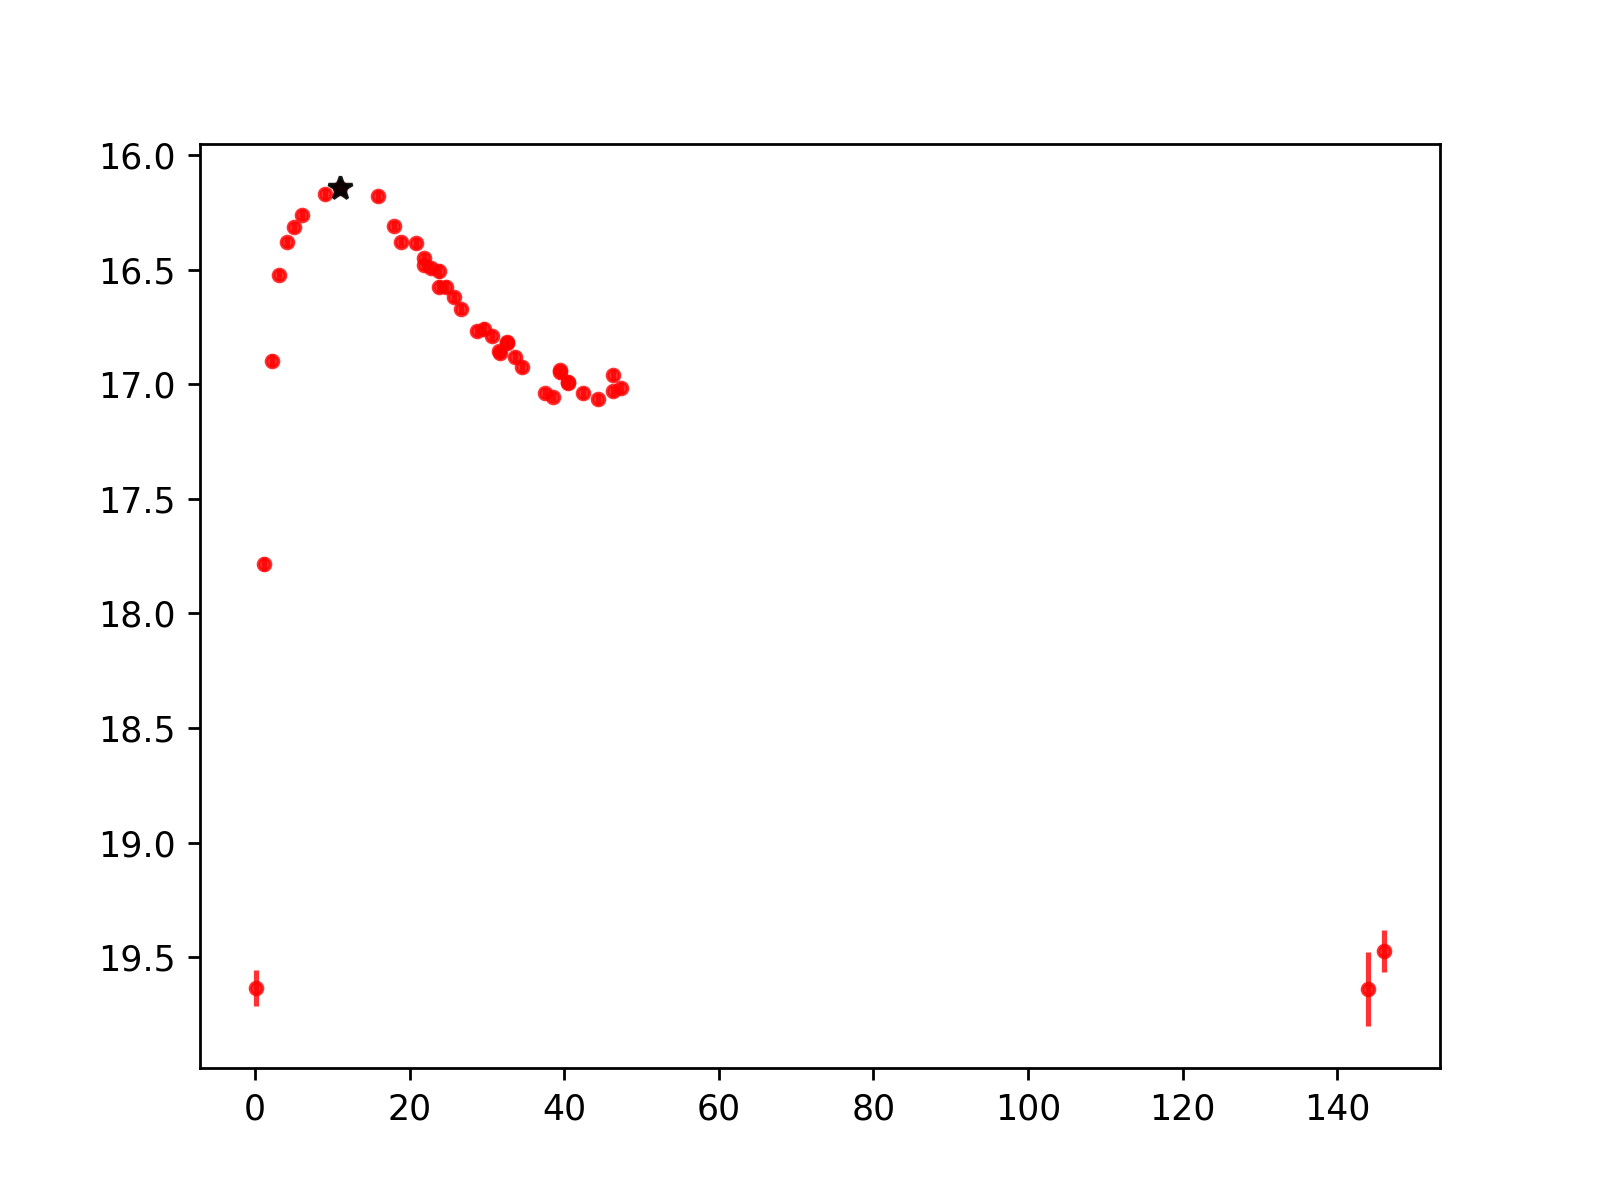

/Users/r.saturn/opt/anaconda3/envs/astropy37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


<IPython.core.display.Javascript object>


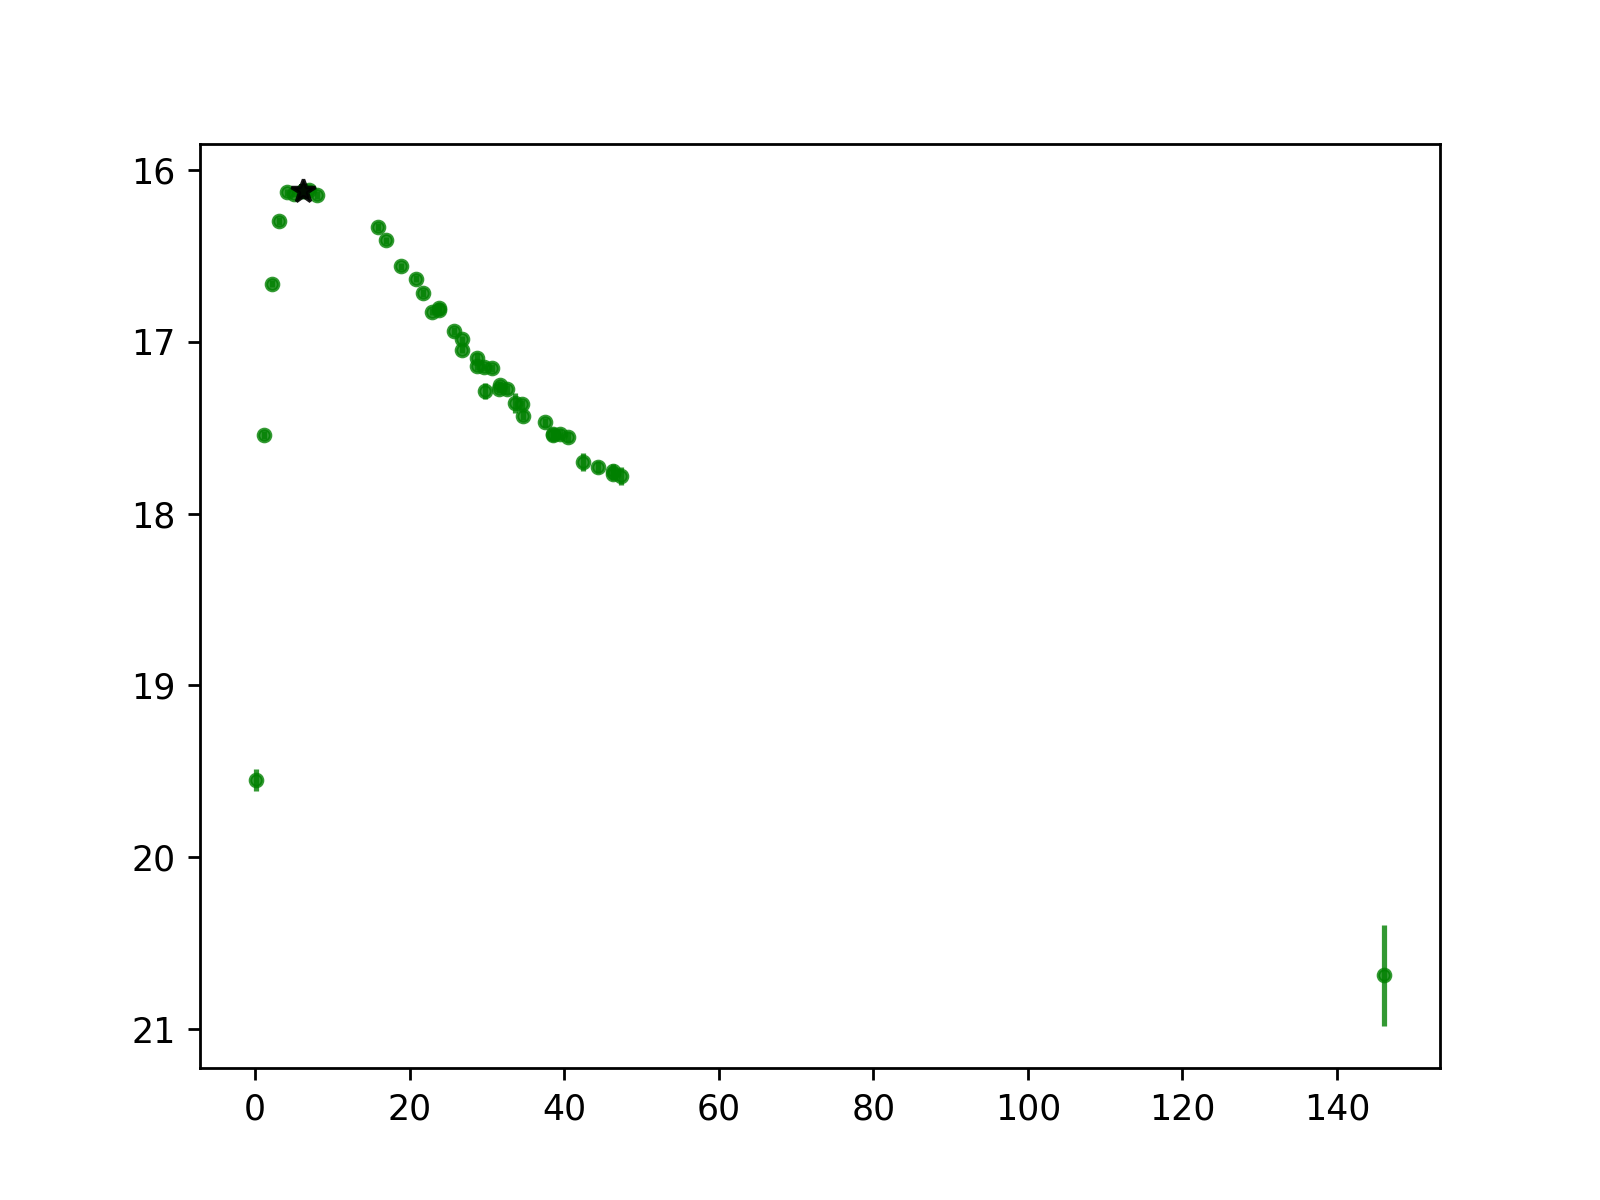

In [11]:
la_force_ohoto = save_forcedphot  +  f'{candiname}_fp.ascii' 

## R BAND 
#### LIGHT CURVE COMPUTATION
peak_r   = peaks_andall[(peaks_andall['name']==candiname)&(peaks_andall['filter']=='r')]
detec_r  = generate_LC(candiname, 'r', peak_r)

plt.figure()
plt.errorbar(detec_r['tfromexplo_zc'],detec_r['mag'],detec_r['emag'],
             fmt='o', alpha = 0.8 ,ms = 3.5,  color = 'red' )
plt.errorbar(peak_r['pday'], peak_r['papmag'], peak_r['e_papmag'], peak_r['e_pday'], 
            fmt= '*', alpha = 0.9,ms = 7 ,elinewidth=4,color = 'black')
plt.gca().invert_yaxis()

## G BAND
#### LIGHT CURVE COMPUTATION 
peak_g   = peaks_andall[(peaks_andall['name']==candiname)&(peaks_andall['filter']=='g')]
detec_g  = generate_LC(candiname, 'g', peak_g)

plt.figure()
plt.errorbar(detec_g['tfromexplo_zc'],detec_g['mag'],detec_g['emag'],
             fmt='o',alpha = 0.8 ,ms = 3.5, color = 'green' )
plt.errorbar(peak_g['pday'], peak_g['papmag'], peak_g['e_papmag'], peak_g['e_pday'], 
            fmt= '*', alpha = 0.9, ms = 7, elinewidth=4,color = 'black')
plt.gca().invert_yaxis()

In [12]:


# ### r band

peak_timer = peaks_andall[(peaks_andall['name']==candiname)&(peaks_andall['filter']=='r')]['pday'][0]
peak_fluxr = peaks_andall[(peaks_andall['name']==candiname)&(peaks_andall['filter']=='r')]['pflux'][0]
peak_magr  = peaks_andall[(peaks_andall['name']==candiname)&(peaks_andall['filter']=='r')]['papmag'][0]




# ### g band

peak_timeg  = peaks_andall[(peaks_andall['name']==candiname)&(peaks_andall['filter']=='g')]['pday'][0]
peak_fluxg  = peaks_andall[(peaks_andall['name']==candiname)&(peaks_andall['filter']=='g')]['pflux'][0]
peak_magg   = peaks_andall[(peaks_andall['name']==candiname)&(peaks_andall['filter']=='g')]['papmag'][0]

peak_absmagg   = peaks_andall[(peaks_andall['name']==candiname)&(peaks_andall['filter']=='g')]['pabmag'][0]
e_peak_absmagg = peaks_andall[(peaks_andall['name']==candiname)&(peaks_andall['filter']=='g')]['e_pabmag'][0]

In [14]:
interp_early_time_info[interp_early_time_info['name']==candiname]

<Table length=2>
    name          chi2fit       filter  fit_type  redshift
   str12          float64        str1    str10    float64 
------------ ------------------ ------ ---------- --------
ZTF20ablygyy 1.2456947980497015      g brokenPLa2 0.016872
ZTF20ablygyy  15.48016362600674      r brokenPLa2 0.016872

In [11]:
meta      = standard_SNII[standard_SNII['name']==candiname]
zez       = [meta['redshift'], meta['e_redshift']]

In [12]:
meta

<Table length=1>
    name     rach-classification Flasher ...    climb_time_r      climb_time_g  
   str12            str10          str4  ...      float64           float64     
------------ ------------------- ------- ... ----------------- -----------------
ZTF20ablygyy               SN II     yes ... 7.190677980323218 4.608315096647424

In [13]:
BROKENPL = '/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/early_lc_fit/Broken_PL_alpha1_0-2/results/'
SIMPLEPL = '/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/early_lc_fit/Simple_PL/results/'

In [20]:
peak_timeg

5.527875442010871

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.451                      │              Nfcn = 241              │
│ EDM = 0.000161 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──

<IPython.core.display.Javascript object>


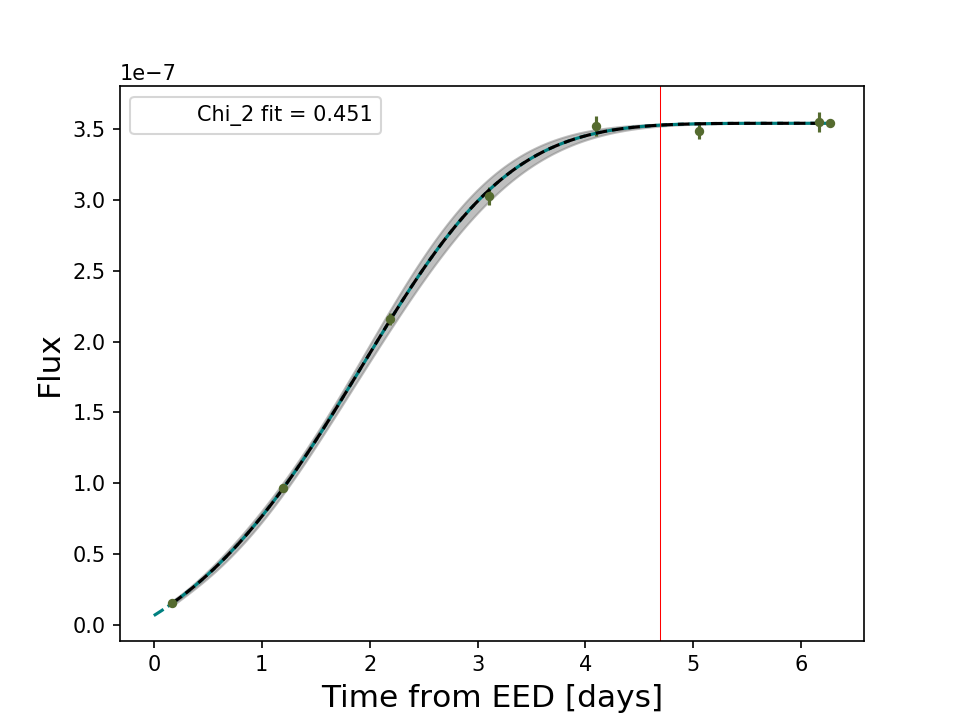

<IPython.core.display.Javascript object>


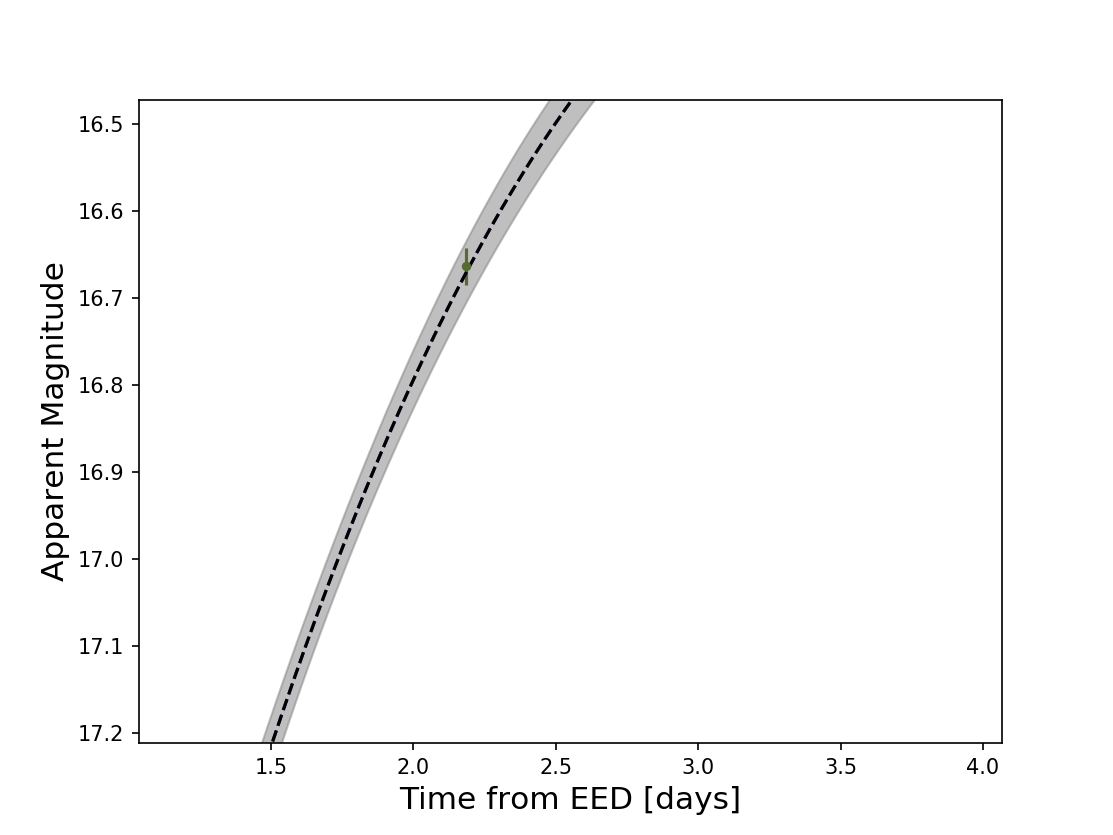

In [40]:

filt      = 'g'

#SIMPLE PL
# param_SPL = ascii.read(SIMPLEPL+f'{candiname}_table_earlylc_parameters_{filt}_band.csv', delimiter = ',')

# guess = [peak_fluxg/10, 5, peak_timeg, peak_fluxg ]
# # guess = [ param_SPL['A'], param_SPL['n'] , peak_timeg, peak_fluxg ]
# # ( param_SPL['A'], param_SPL['n'] , peak_timeg, peak_fluxg)
# bound = {'A': (0,peak_fluxg), 'n':(0,10) } 
# # step  = {'n':0.01} 
# fixed = ['t_peak','peak_val']

# fittyg = Fit_simple_EXP_law(detec_g, 0 , peak_timeg, peak_fluxg , filter = filt, zez=zez)
# # fittyg.set_minuit(guess=guess, boundaries = bound, fixed = fixed)
# # fittyg.plot_current_parameters()
# fittyg.fit_minuit(guess, boundaries = bound, fixed = fixed)
# fittyg.plot_fit(add_plot=None)
# fittyg.plot_fit_conv_mag()


# BROKEN PL

param_BPL = ascii.read(BROKENPL+f'{candiname}_table_earlylc_parameters_{filt}_band.csv', delimiter = ',')


guess = (param_BPL['A'][0], param_BPL['alpha1'][0] , param_BPL['t_break'][0], param_BPL['alpha2'][0], 
             1, peak_timeg, peak_fluxg)

bound = {'A': (0,peak_fluxg*4), 'alpha1':(-2,10), 't_break':(0.1, param_BPL['t_break'][0]), 'alpha2': (-2,10) } 
step  = {'alpha1':0.01, 't_break':0.5, 'alpha2': 0.01} 
fixed = ['n', 't_peak','peak_val']
fittyg = Fit_broken_PL(detec_g, 0 , peak_timeg, peak_fluxg , filter = filt, zez=zez)
fittyg.fit_minuit(guess, boundaries = bound, fixed = fixed, step_sizes = step)
fittyg.plot_fit(add_plot = None)
fittyg.plot_fit_conv_mag()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 10.79                      │              Nfcn = 230              │
│ EDM = 7.52e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──

<IPython.core.display.Javascript object>


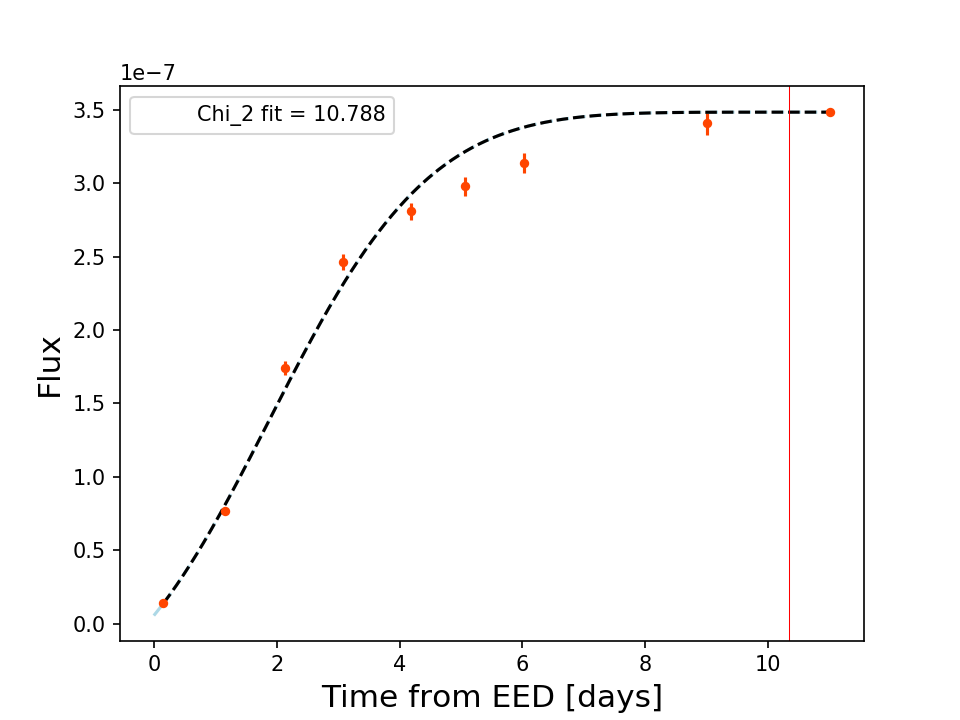

<IPython.core.display.Javascript object>


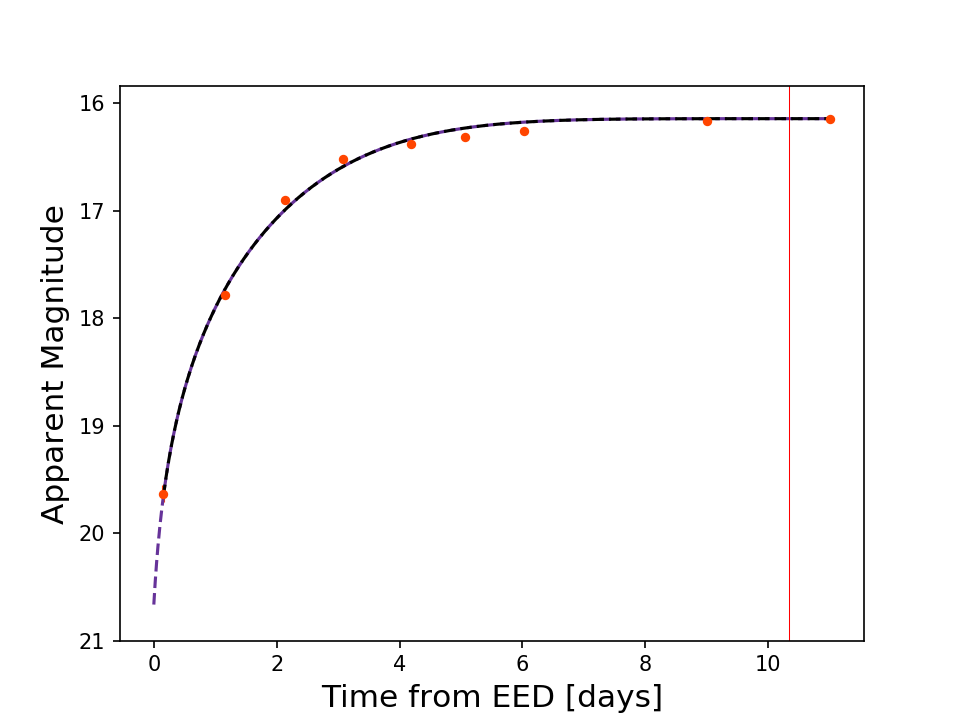

In [136]:
# SIMPLE PL

filt      = 'r'

# param_SPL = ascii.read(SIMPLEPL+f'{candiname}_table_earlylc_parameters_{filt}_band.csv', delimiter = ',')


# guess = ( param_SPL['A'], param_SPL['n'], peak_timer, peak_fluxr)

# # guess = [peak_magr/2, 1.6,peak_timer, peak_magr ]
# bound = {'A': [0,peak_fluxr], 'n':[0,5] } 
# fixed = ['t_peak','peak_val']


# fittyr = Fit_simple_EXP_law(detec_r, 0 , peak_timer, peak_fluxr,  filter = 'r', zez=zez )
# fittyr.fit_minuit(guess, bound, fixed = fixed)
# fittyr.plot_fit(add_plot=None)
# fittyr.plot_fit_conv_mag()


##BROKEN PL 

param_BPL = ascii.read(BROKENPL+f'{candiname}_table_earlylc_parameters_{filt}_band.csv', delimiter = ',')


guess = (param_BPL['A'][0], param_BPL['alpha1'][0] , param_BPL['t_break'][0], param_BPL['alpha2'][0], 
             1, peak_timer, peak_fluxr)

bound = {'A': (0,peak_fluxg*2), 'alpha1':(-2,10), 't_break':(0.1, param_BPL['t_break'][0]), 'alpha2': (-2,10) } 
step  = {'alpha1':0.01, 't_break':0.2, 'alpha2': 0.01} 
fixed = ['n', 't_peak','peak_val']
fittyr = Fit_broken_PL(detec_r, 0 , peak_timer, peak_fluxr , filter = filt, zez=zez)
fittyr.fit_minuit(guess, boundaries = bound, fixed = fixed, step_sizes = step)
fittyr.plot_fit(add_plot = None)
fittyr.plot_fit_conv_mag()

# After peak interpolation

In [52]:
# lc_r            = detec_r[(detec_r['mag']!= 99.)&(detec_r['tfromexplo_zc'] >= -0.5)] 

lc_r_late       = detec_r[(detec_r['tfromexplo_zc']>= peak_timer)&(detec_r['tfromexplo_zc']<= 100)]
lc_r_late       = lc_r_late['tfromexplo_zc', 'mag','emag']
lc_r_late.add_row([peak_timer, peak_magr, 0])
lc_r_late.sort('tfromexplo_zc')

# lc_g            = lc[(lc['filter']== 'g')&(lc['mag']!= 99.)&(lc['tfromexplo_zc'] >= -0.5)] 

lc_g_late       = detec_g[(detec_g['tfromexplo_zc']>= peak_timeg)&(detec_g['tfromexplo_zc']<= 100)]
lc_g_late       = lc_g_late['tfromexplo_zc', 'mag','emag']
lc_g_late.add_row([peak_timeg, peak_magg, 0])
lc_g_late.sort('tfromexplo_zc')

In [53]:
dec_param_r   = declinaison[(declinaison['name']==candiname)&(declinaison['filter']=='r')]['a'][0]
mean_param_r  = [dec_param_r, peak_magr, peak_timer]

dec_param_g   = declinaison[(declinaison['name']==candiname)&(declinaison['filter']=='g')]['a'][0]
mean_param_g  = [dec_param_g, peak_magg, peak_timeg]

In [54]:
# gp_lc_r       = gp_interp_lc(lc_r_late, 150, 'r')
gp_lc_r         = gp_interp_lc_linear_mean(lc_r_late, 100, 'r', mean_param_r)


# gp_lc_g       = gp_interp_lc(lc_g_late, 150, 'g')
gp_lc_g       = gp_interp_lc_linear_mean(lc_g_late, 100, 'g', mean_param_g)

<IPython.core.display.Javascript object>


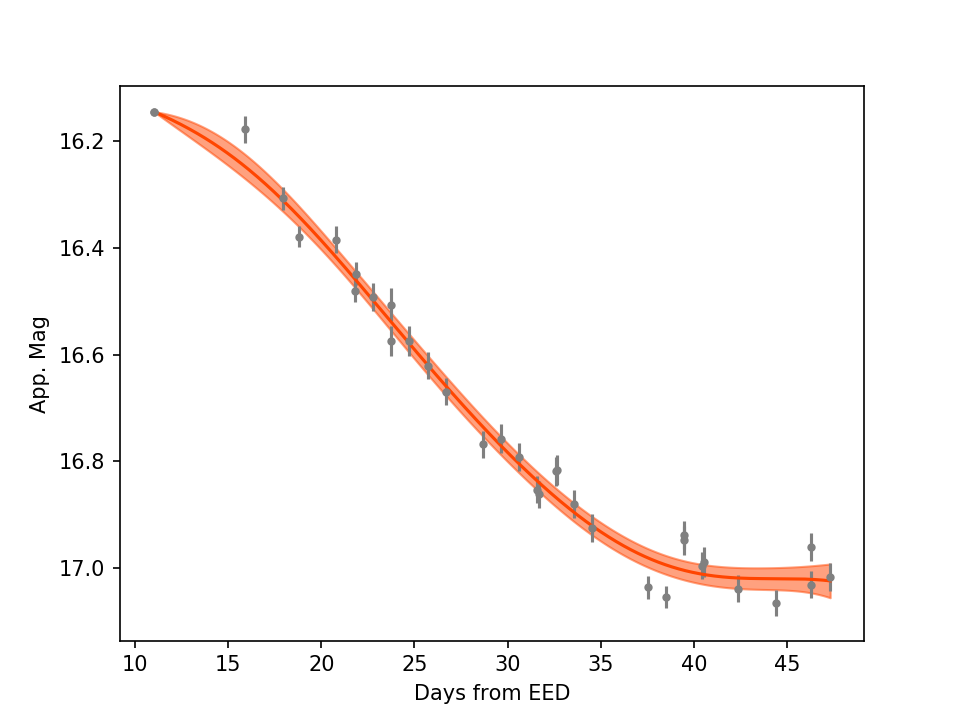

In [55]:
plt.figure()

plt.errorbar(lc_r_late['tfromexplo_zc'], lc_r_late['mag'], lc_r_late['emag'], fmt='o', ms = 3, color = 'grey')

h = plt.plot(gp_lc_r['gp_time'], gp_lc_r['gp_mag'], color = 'orangered' )
plt.fill_between(gp_lc_r['gp_time'], gp_lc_r['gp_mag'] + np.sqrt(gp_lc_r['gp_e_mag']), gp_lc_r['gp_mag'] - np.sqrt(gp_lc_r['gp_e_mag']), 
                        alpha=0.5, color=h[0].get_color())

plt.xlabel('Days from EED')
plt.ylabel('App. Mag')
plt.gca().invert_yaxis()

<IPython.core.display.Javascript object>


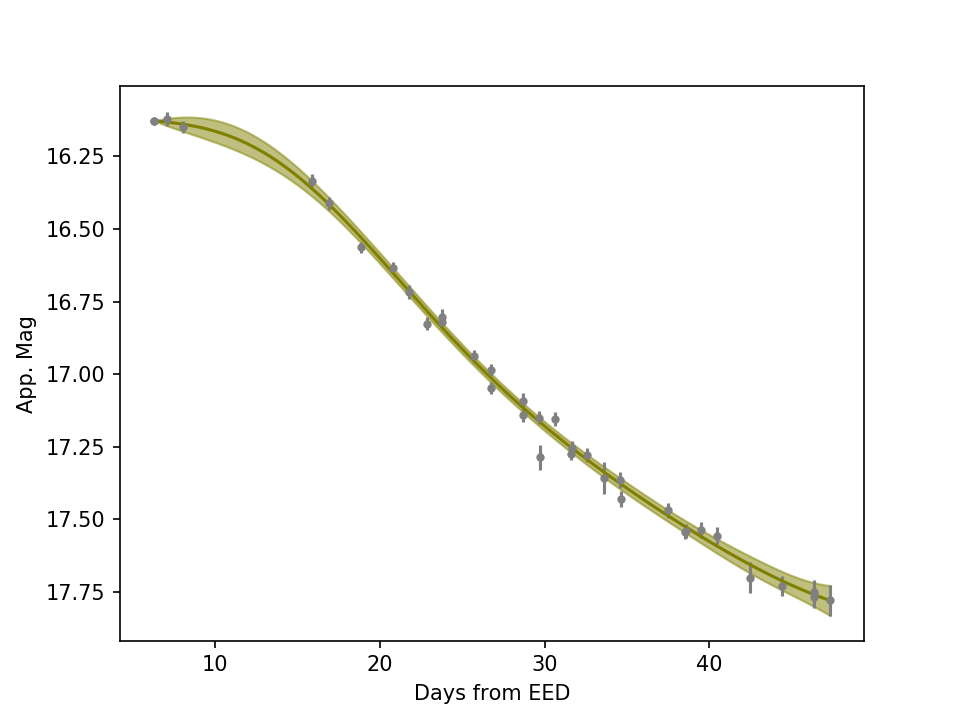

In [56]:
plt.figure()

plt.errorbar(lc_g_late['tfromexplo_zc'], lc_g_late['mag'], lc_g_late['emag'], fmt='o', ms = 3, color = 'grey')

h = plt.plot(gp_lc_g['gp_time'], gp_lc_g['gp_mag'], color = 'olive' )
plt.fill_between(gp_lc_g['gp_time'], gp_lc_g['gp_mag'] + np.sqrt(gp_lc_g['gp_e_mag']), gp_lc_g['gp_mag'] - np.sqrt(gp_lc_g['gp_e_mag']), 
                        alpha=0.5, color=h[0].get_color())

plt.xlabel('Days from EED')
plt.ylabel('App. Mag')
plt.gca().invert_yaxis()

In [57]:
early_lc_r = Table([fittyr.t_res,fittyr.fit_mag_res,fittyr.fit_e_mag_res],names = ('t','mag','emag'))

early_lc_g = Table([fittyg.t_res,fittyg.fit_mag_res,fittyg.fit_e_mag_res],names = ('t','mag','emag'))

In [58]:
late_lc_r = Table([gp_lc_r['gp_time'], gp_lc_r['gp_mag'],gp_lc_r['gp_e_mag']],names = ('t','mag','emag'))

late_lc_g = Table([gp_lc_g['gp_time'], gp_lc_g['gp_mag'], gp_lc_g['gp_e_mag']],names = ('t','mag','emag'))

In [59]:
full_interpo_r = vstack([early_lc_r,late_lc_r])

full_interpo_g = vstack([early_lc_g,late_lc_g])

<IPython.core.display.Javascript object>


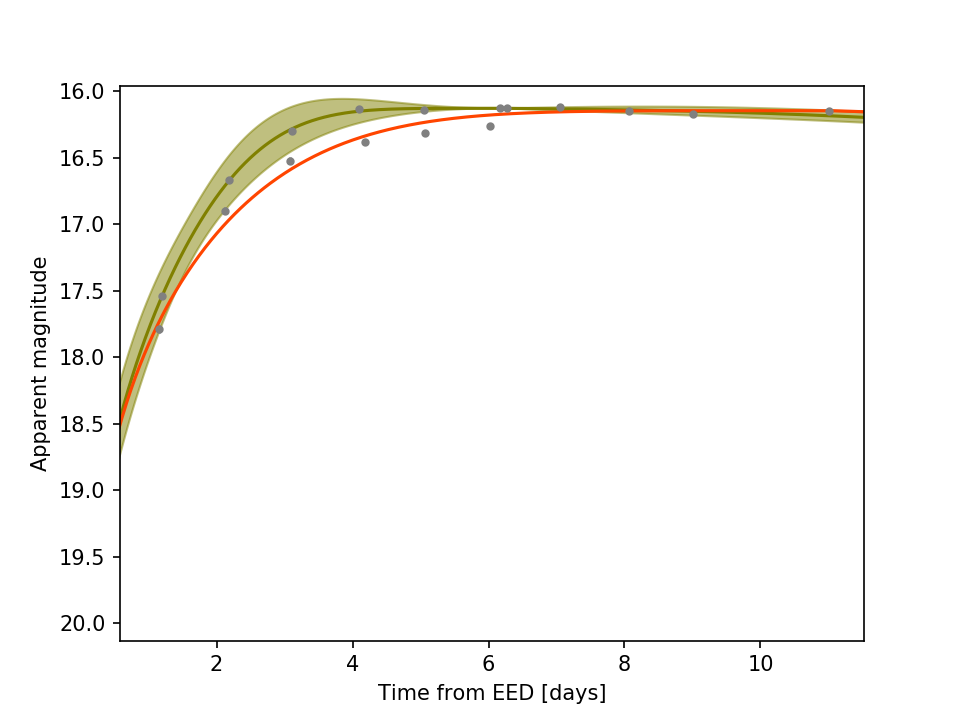

In [137]:
plt.figure()
plt.errorbar(detec_g['tfromexplo_zc'], detec_g['mag'], detec_g['emag'], fmt='o', ms = 3, color = 'grey')
h = plt.plot(full_interpo_g['t'], full_interpo_g['mag'], color = 'olive' )
plt.fill_between(full_interpo_g['t'], full_interpo_g['mag'] + np.sqrt(full_interpo_g['emag']), full_interpo_g['mag'] - np.sqrt(full_interpo_g['emag']), 
                 alpha=0.5, color=h[0].get_color())




plt.errorbar(detec_r['tfromexplo_zc'], detec_r['mag'], detec_r['emag'], fmt='o', ms = 3, color = 'grey')
h = plt.plot(full_interpo_r['t'], full_interpo_r['mag'], color = 'orangered' )
plt.fill_between(full_interpo_r['t'], full_interpo_r['mag'] + np.sqrt(full_interpo_r['emag']), full_interpo_r['mag'] - np.sqrt(full_interpo_r['emag']), 
                 alpha=0.5, color=h[0].get_color())

plt.xlabel('Time from EED [days]')
plt.ylabel('Apparent magnitude')
plt.xlim([-0.5,100])
plt.gca().invert_yaxis()


<IPython.core.display.Javascript object>


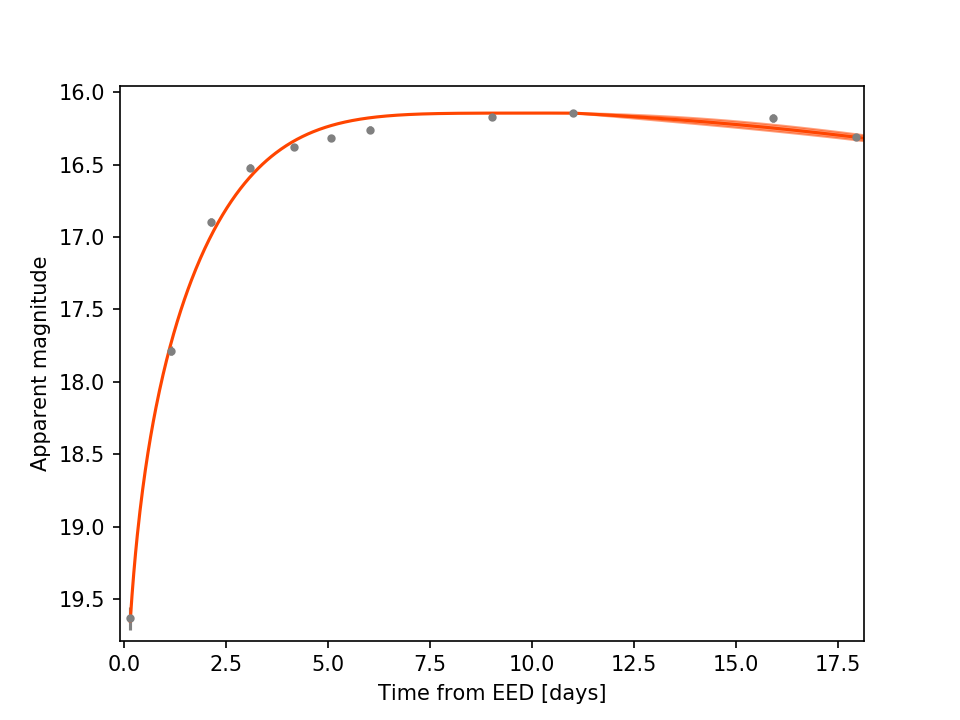

In [61]:
plt.figure()
plt.errorbar(detec_r['tfromexplo_zc'], detec_r['mag'], detec_r['emag'], fmt='o', ms = 3, color = 'grey')
h = plt.plot(full_interpo_r['t'], full_interpo_r['mag'], color = 'orangered' )
plt.fill_between(full_interpo_r['t'], full_interpo_r['mag'] + np.sqrt(full_interpo_r['emag']), full_interpo_r['mag'] - np.sqrt(full_interpo_r['emag']), 
                 alpha=0.5, color=h[0].get_color())

plt.xlabel('Time from EED [days]')
plt.ylabel('Apparent magnitude')
plt.xlim([-0.5,100])
plt.gca().invert_yaxis()


In [101]:
min_interp = max(min(full_interpo_r['t']), min(full_interpo_g['t']))
# max_interp = min(max(fittyg.t_fit), max(fittyr.t_fit))
max_interp = min(max(full_interpo_r['t']), max(full_interpo_g['t']))

In [102]:
full_interpo_r = full_interpo_r[(full_interpo_r['t']>=min_interp)&(full_interpo_r['t']<=max_interp)]
full_interpo_g = full_interpo_g[(full_interpo_g['t']>=min_interp)&(full_interpo_g['t']<=max_interp)]

<IPython.core.display.Javascript object>


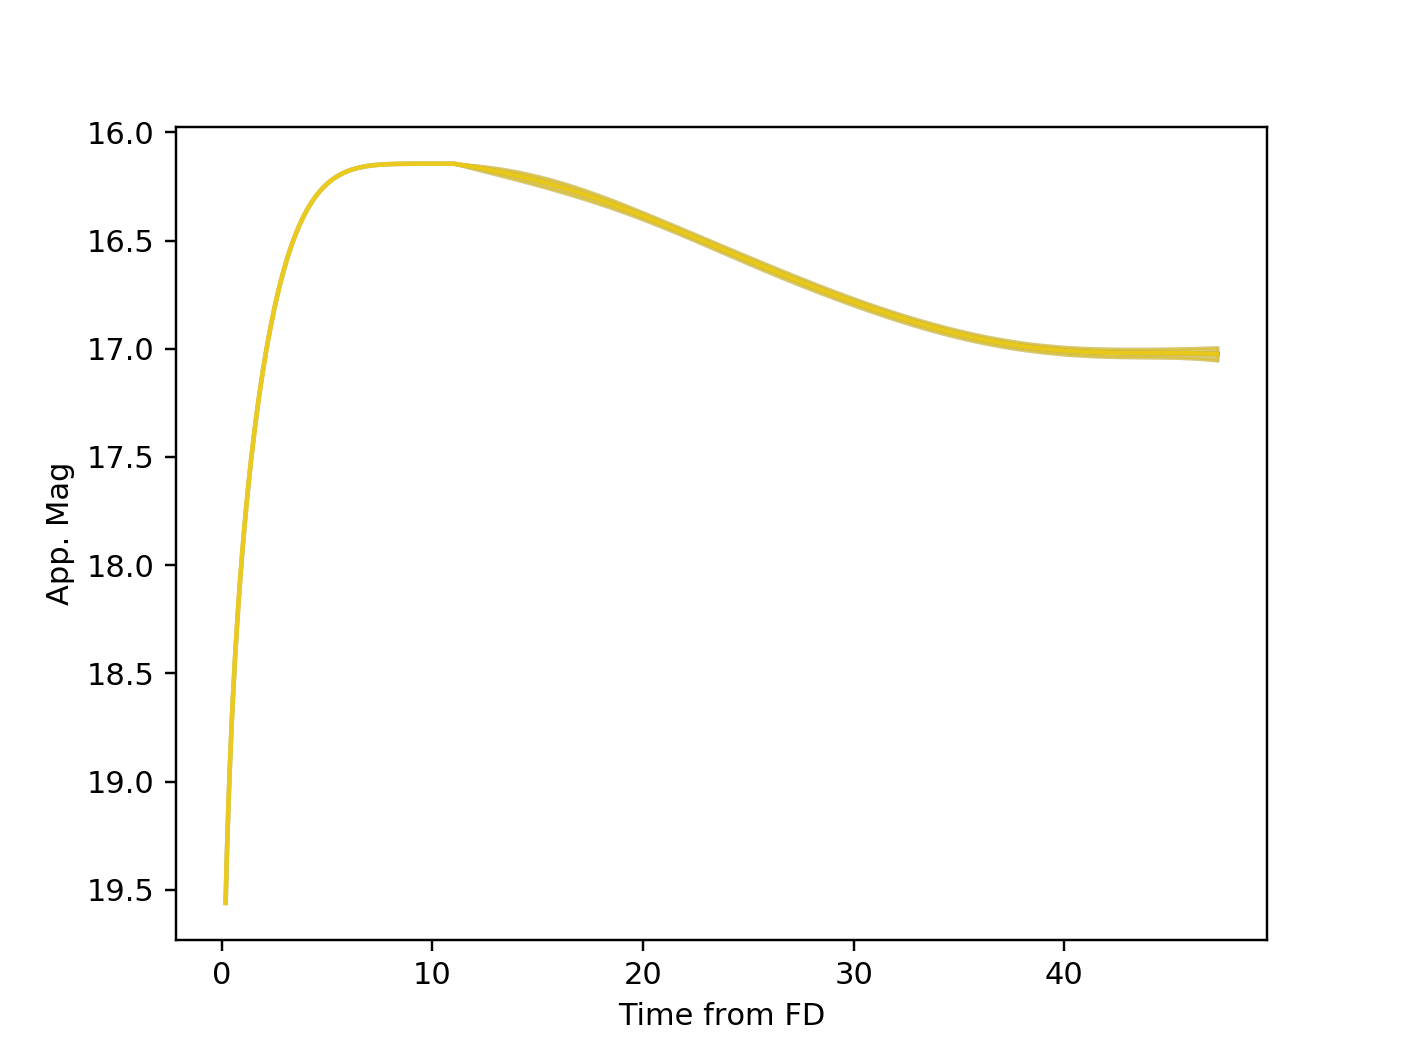

In [110]:
tr,magr,emagr = interpolate_LC_with_errors(full_interpo_r['t'],full_interpo_r['mag'],full_interpo_r['emag'],
                                           min_interp,max_interp,peak_timeg,
                                           plot=True)

<IPython.core.display.Javascript object>


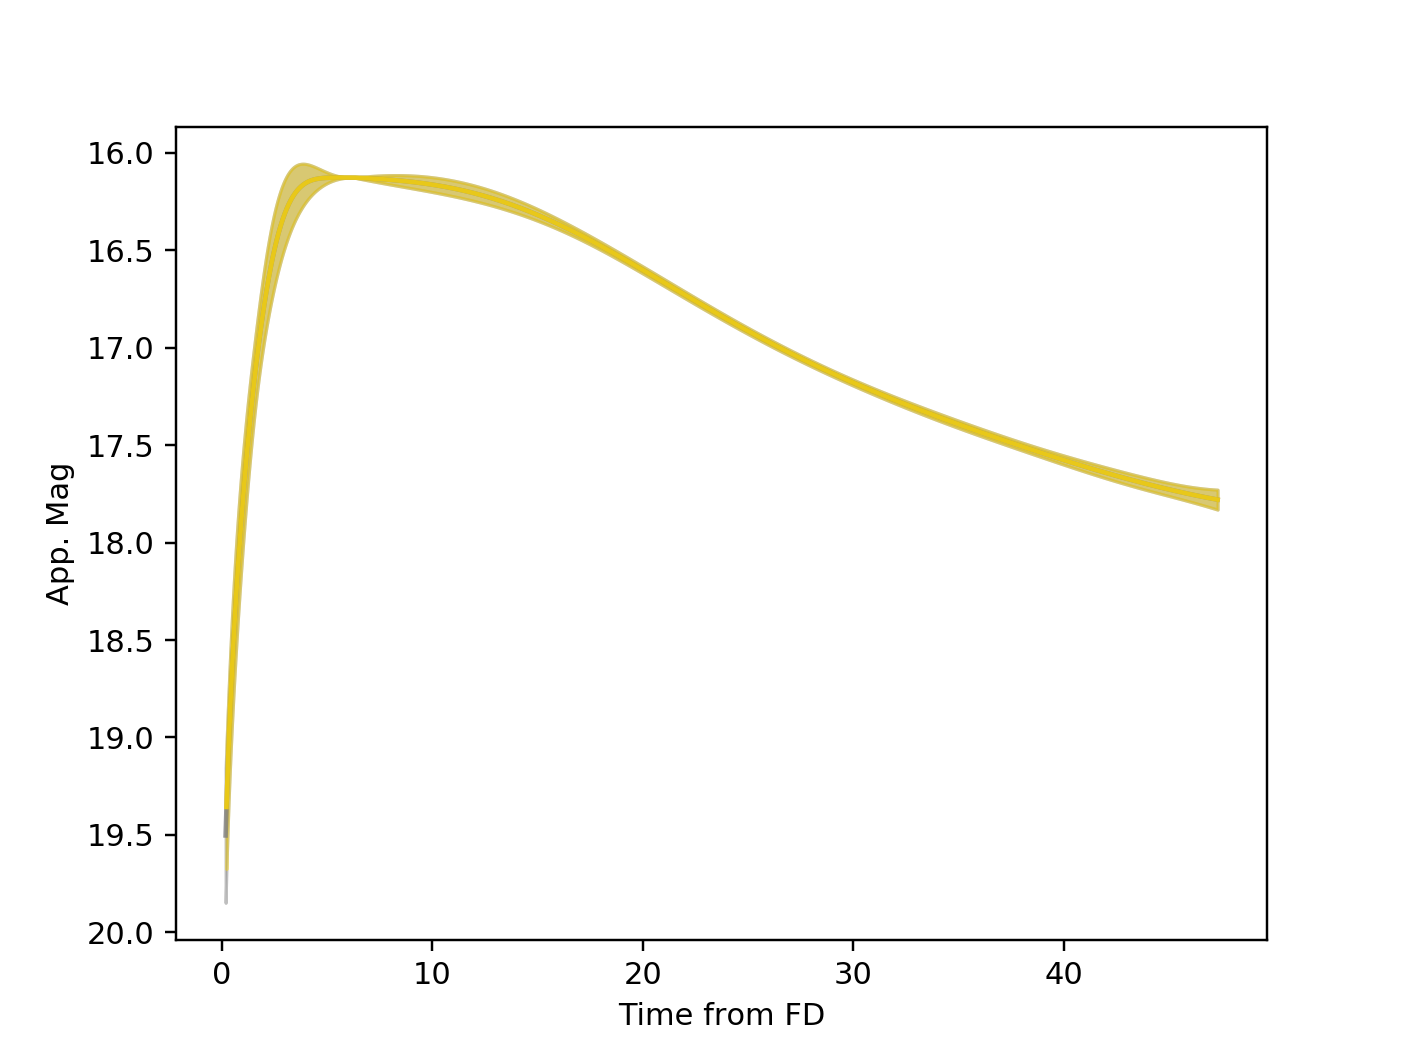

In [111]:
tg,magg,emagg = interpolate_LC_with_errors(full_interpo_g['t'],full_interpo_g['mag'],full_interpo_g['emag'],
                                           min_interp,max_interp,peak_timeg,
                                           plot=True)

In [114]:
emagg = np.where(np.isnan(emagg)==True,  0.2 , emagg )

In [115]:
emagr = np.where(np.isnan(emagr)==True, 0.2, emagr )

In [128]:
t_from_peakg = tr 
g_r          = magg-magr
e_g_r        = np.sqrt(emagg**2+emagr**2)

In [129]:
# e_g_r

In [130]:
color_ev     = Table([t_from_peakg,g_r,e_g_r], names = ('t_frompeakg', 'g-r', 'e_g-r'))
# ascii.write(color_ev, f'/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/color_evolution/results_full_lc/{candiname}_fullLC_colorev.csv', delimiter = ',')
        

In [131]:
catpeakg      = color_ev[color_ev['t_frompeakg'] == 0]['g-r'][0]
e_catpeakg    = color_ev[color_ev['t_frompeakg'] == 0]['e_g-r'][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [132]:
# colg.add_row([candiname,catpeakg,e_catpeakg,peak_absmagg,e_peak_absmagg])

In [95]:
# len(colg)

<IPython.core.display.Javascript object>


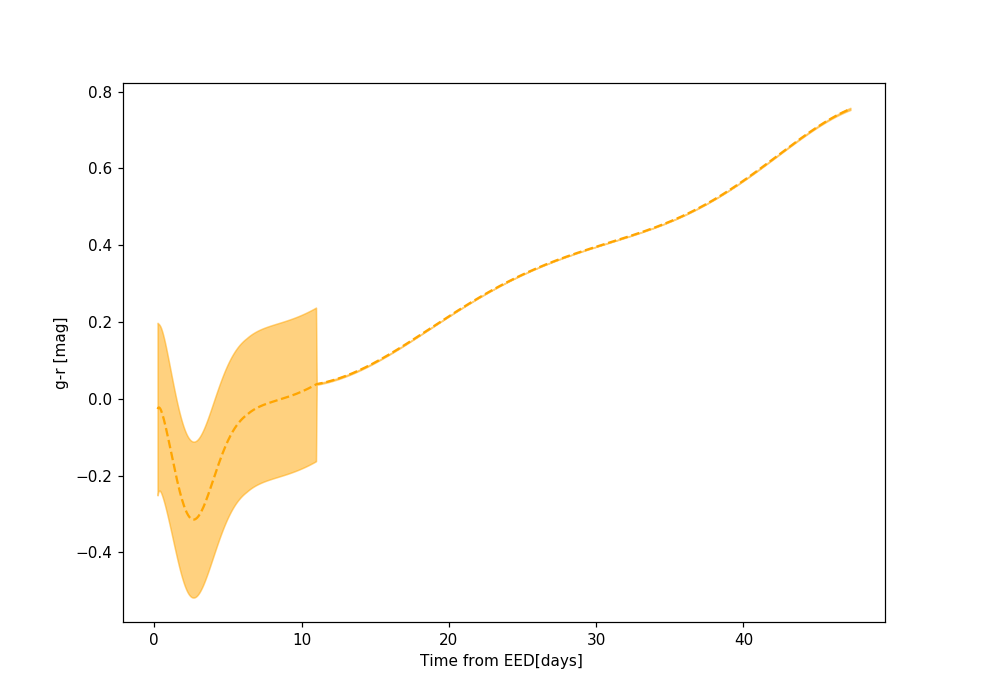

Text(0, 0.5, 'g-r [mag]')

In [134]:
plt.figure()
plt.plot(t_from_peakg , g_r, ls = '--' , color = 'orange' )
plt.fill_between(t_from_peakg, g_r - e_g_r, g_r + e_g_r,color = 'orange', alpha=0.5)

plt.xlabel('Time from EED[days] ')
plt.ylabel('g-r [mag]')

## From script computation,plot LC

In [8]:
path = '/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/full_lc_interpolation/fullLC_interp_nocolour/tables/'

In [10]:
candiname = 'ZTF18abcezmh'

In [11]:
interp_r = ascii.read(path+f'{candiname}_rband_interpolation.csv')
interp_g = ascii.read(path+f'{candiname}_gband_interpolation.csv')

In [12]:
interp_r

<Table length=1001>
       t_r                mag                e_mag        
     float64            float64             float64       
------------------ ------------------ --------------------
0.9174875826574862  21.31724858633301   1.0153440658140183
1.0149102795457055  21.24358385284927     0.91914039457078
 1.112332976433925  21.17452793763998    0.835222885765673
1.2097556733221442  21.10954196965744   0.7615172027764132
1.3071783702103636 21.048194173623504   0.6964326490153611
 1.404601067098583 20.990164989693685   0.6387899575056656
1.5020237639868022 20.935030444771744   0.5873144405134589
1.5994464608750216 20.882517245287232   0.5411702483402916
1.6968691577632409 20.832413925195368  0.49971506101673824
1.7942918546514601 20.784530200627398   0.4623985447559097
               ...                ...                  ...
 97.36595750199463 20.798229058083262  0.03599829365634047
 97.46338019888285 20.804121152788024 0.037027825582312365
 97.56080289577106   20.8101091216543  0.03808447089346516
 97.65822559265929 20.816191757793746   0.0391684483763735
 97.75564828954751 20.822368308869486  0.04028010113434241
 97.85307098643572 20.828644880425944 0.041421878646422314
 97.95049368332394 20.835020964238222  0.04259430927316967
 98.04791638021216   20.8414883173444 0.043795467892133295
 98.14533907710039 20.848046074617525  0.04502565410183014
  98.2427617739886 20.854693346457065  0.04628515635497871

In [18]:
detec_r  = generate_LC(candiname, 'r')

/Users/r.saturn/opt/anaconda3/envs/astropy37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [21]:
detec_g  = generate_LC(candiname, 'g')

/Users/r.saturn/opt/anaconda3/envs/astropy37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


<IPython.core.display.Javascript object>


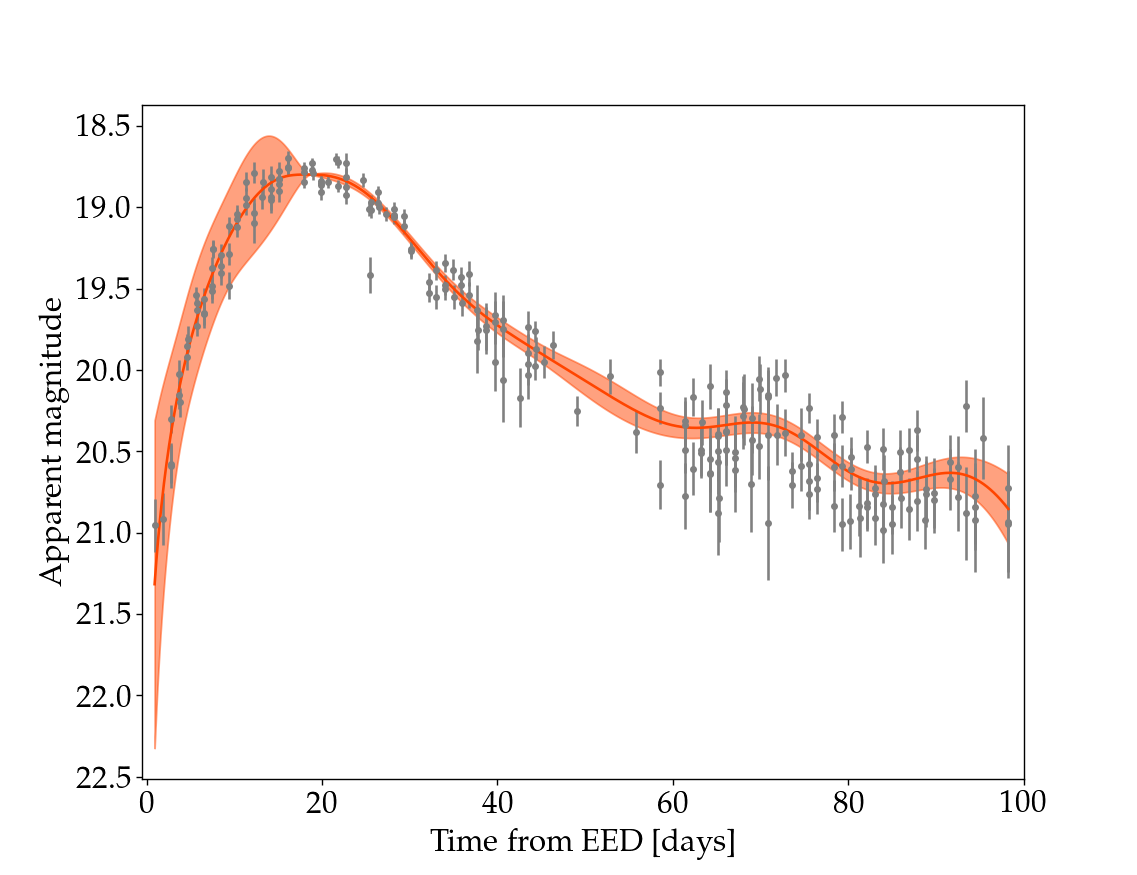

In [23]:
plt.figure(figsize = (1.3*7,7))
plt.errorbar(detec_r['tfromexplo_zc'], detec_r['mag'], detec_r['emag'], fmt='o', ms = 3, color = 'grey')
h = plt.plot(interp_r['t_r'], interp_r['mag'], color = 'orangered' )
plt.fill_between(interp_r['t_r'], interp_r['mag'] + np.sqrt(interp_r['e_mag']), interp_r['mag'] - np.sqrt(interp_r['e_mag']), 
                 alpha=0.5, color=h[0].get_color())

plt.xlabel('Time from EED [days]', size = 18)
plt.ylabel('Apparent magnitude', size = 18)
plt.xlim([-0.5,100])
plt.gca().invert_yaxis()

In [24]:
plt.savefig(f'/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/figures/lc_interpolaiton/{candiname}_lc_interp_red.pdf')

<IPython.core.display.Javascript object>


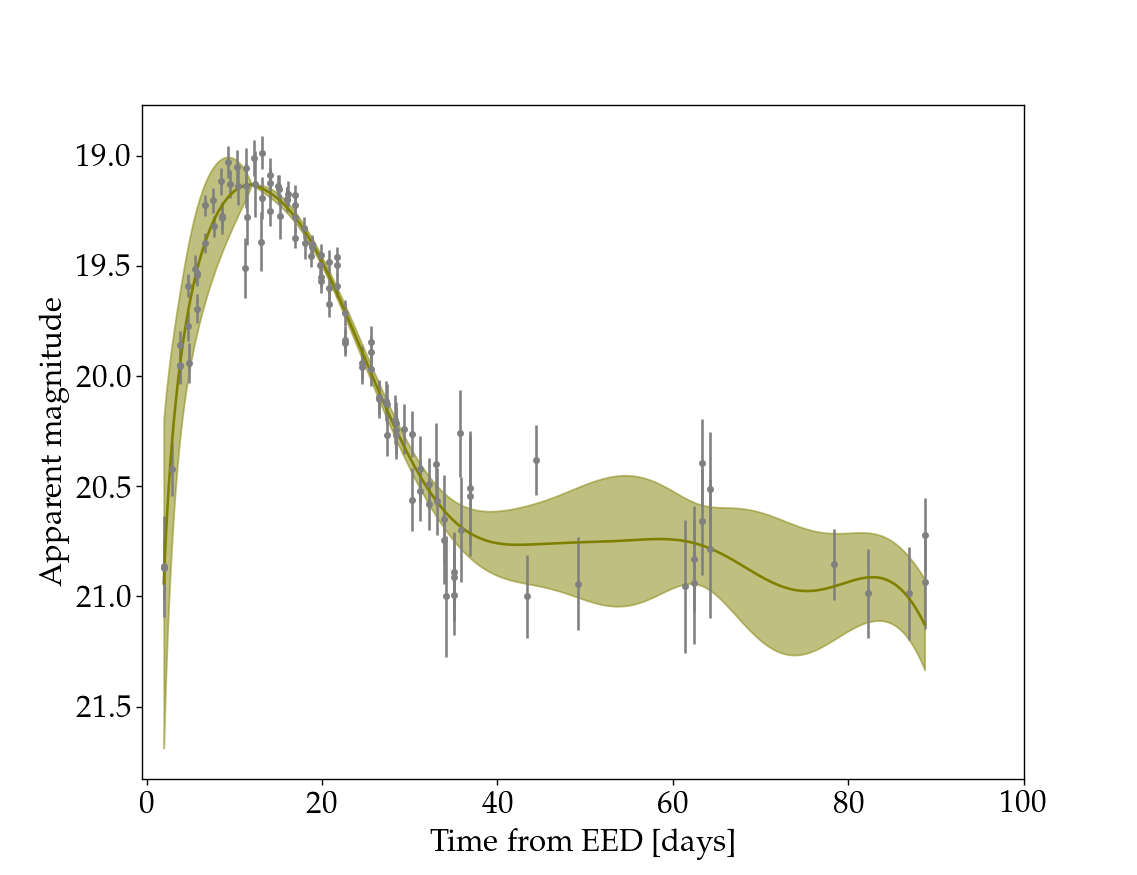

In [25]:
plt.figure(figsize = (1.3*7,7))
plt.errorbar(detec_g['tfromexplo_zc'], detec_g['mag'], detec_g['emag'], fmt='o', ms = 3, color = 'grey')
h = plt.plot(interp_g['t_g'], interp_g['mag'], color = 'olive' )
plt.fill_between(interp_g['t_g'], interp_g['mag'] + np.sqrt(interp_g['e_mag']), interp_g['mag'] - np.sqrt(interp_g['e_mag']), 
                 alpha=0.5, color=h[0].get_color())

plt.xlabel('Time from EED [days]', size = 18)
plt.ylabel('Apparent magnitude', size = 18)
plt.xlim([-0.5,100])
plt.gca().invert_yaxis()

In [26]:
plt.savefig(f'/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/figures/lc_interpolaiton/{candiname}_lc_interp_green.pdf')

## Colour at peak

In [9]:
colg = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/color_evolution/color_at_peakg_06022022.csv', delimiter = ',')

In [10]:
colg

<Table length=86>
    name              cpg          ...       peakabsg           e_abspeakg     
   str12            float64        ...       float64             float64       
------------ --------------------- ... ------------------- --------------------
ZTF18aadsuxd   -0.1417643239077364 ...  -19.01666988979831  0.01815331876476588
ZTF18aaqkoyr  -0.14351349142700087 ...  -17.34481290626891 0.003969969781832504
ZTF18aawyjjq  -0.06437783414586562 ...  -17.75462992013677 0.026542590784192785
ZTF18aaxwrjt   0.03194893026590151 ... -16.964224569828858  0.03259026041106191
ZTF18aayxxew  -0.03122752750088509 ... -17.506180814101043 0.017334774707801412
ZTF18abcezmh    0.1666431220067004 ...  -17.97153938456404  0.01550165434802277
ZTF18abckutn -0.036735698708707076 ... -17.511123656906882 0.014952041887626596
ZTF18abcptmt  -0.06808777229141327 ... -18.246052041161633  0.10798011165423668
ZTF18abcqhgr  -0.04379280804737462 ...  -18.36986301998686 0.005146033394468123
ZTF18abdbysy    0.9640428241590762 ... -14.505103984137875  0.03272188124838144
         ...                   ... ...                 ...                  ...
ZTF20aciwrpn  -0.19511026731726488 ... -18.939846538394207  0.34527301844370034
ZTF20acjbhhp  -0.15743677124346078 ... -19.054623494011608    0.434055803978134
ZTF20acknpig  0.028032197492848354 ... -16.889773928389708 0.024918541695816063
ZTF20acocohy   0.06102387158966849 ...  -19.35770092436222     0.21868435659761
ZTF20acongti  -0.09009319762594004 ... -17.453746498956015  0.06548997869828971
ZTF20acpevli  -0.00852756339485694 ... -18.213450256593198 0.018680515841712243
ZTF20acqexmr   0.26011963354221024 ... -16.911672104153112   1.3161349397179605
ZTF20actawpa   -0.0101354303308554 ... -18.441377006236387   0.6047062544199235
ZTF20acuaqlf   0.04920212512785227 ... -16.526599375589242   0.1523675962542654
ZTF20acwgxhk -0.001737088824370403 ... -17.873743047192796 0.021850046008021186

In [11]:
colg = colg[colg['name']!='ZTF19abueupg']

In [12]:
risetimeg = []

for candiname in colg['name']:
    _temp = standard_SNII[standard_SNII['name']==candiname]
    
    risetimeg.append(_temp['peakday_g'][0])
    
    
colg['risetimeg'] = risetimeg

In [13]:
colg

<Table length=85>
    name              cpg          ...      e_abspeakg          risetimeg     
   str12            float64        ...       float64             float64      
------------ --------------------- ... -------------------- ------------------
ZTF18aadsuxd   -0.1417643239077364 ...  0.01815331876476588  13.73982016524336
ZTF18aaqkoyr  -0.14351349142700087 ... 0.003969969781832504  6.844667835030683
ZTF18aawyjjq  -0.06437783414586562 ... 0.026542590784192785 10.421350563271961
ZTF18aaxwrjt   0.03194893026590151 ...  0.03259026041106191   7.19410538266076
ZTF18aayxxew  -0.03122752750088509 ... 0.017334774707801412  8.279741870568099
ZTF18abcezmh    0.1666431220067004 ...  0.01550165434802277 11.963166177864895
ZTF18abckutn -0.036735698708707076 ... 0.014952041887626596  9.522573088435623
ZTF18abcptmt  -0.06808777229141327 ...  0.10798011165423668  7.556389923992768
ZTF18abcqhgr  -0.04379280804737462 ... 0.005146033394468123  8.115682815239023
ZTF18abdbysy    0.9640428241590762 ...  0.03272188124838144 10.372182527968567
         ...                   ... ...                  ...                ...
ZTF20aciwrpn  -0.19511026731726488 ...  0.34527301844370034  7.867758164072171
ZTF20acjbhhp  -0.15743677124346078 ...    0.434055803978134 10.973958817516976
ZTF20acknpig  0.028032197492848354 ... 0.024918541695816063   8.47998545711054
ZTF20acocohy   0.06102387158966849 ...     0.21868435659761  8.515407931639336
ZTF20acongti  -0.09009319762594004 ...  0.06548997869828971  8.697332526948193
ZTF20acpevli  -0.00852756339485694 ... 0.018680515841712243 10.850400263384353
ZTF20acqexmr   0.26011963354221024 ...   1.3161349397179605  6.137168954641341
ZTF20actawpa   -0.0101354303308554 ...   0.6047062544199235  9.307195991180798
ZTF20acuaqlf   0.04920212512785227 ...   0.1523675962542654 11.267910047511364
ZTF20acwgxhk -0.001737088824370403 ... 0.021850046008021186  9.062164550112044

In [14]:
from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

In [9]:
# colg.sort('name')

<IPython.core.display.Javascript object>


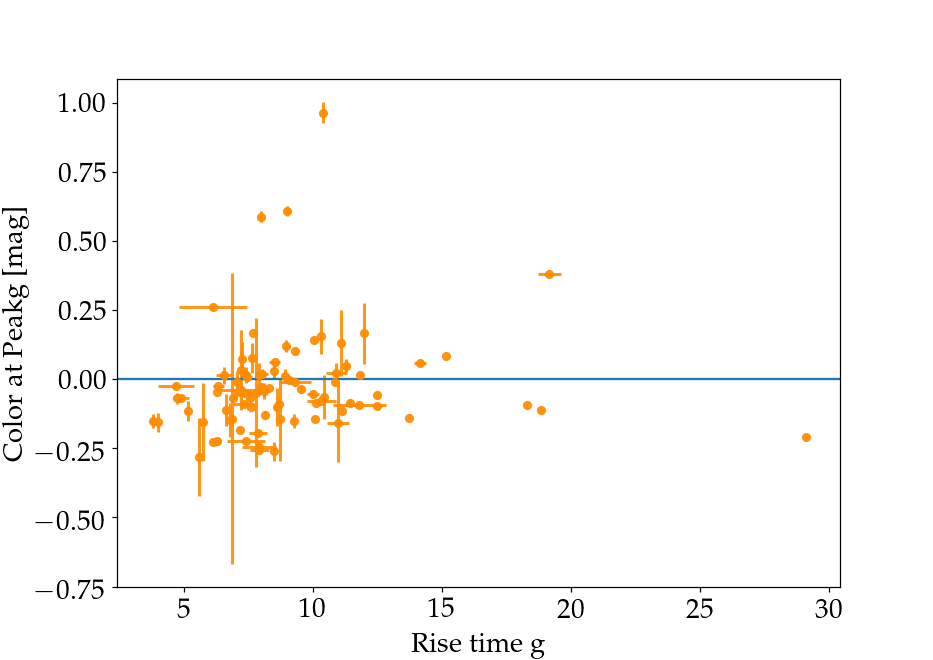

Text(0, 0.5, 'Color at Peakg [mag]')

In [15]:
plt.figure(figsize = (6*np.sqrt(2),6))
plt.errorbar(colg['risetimeg'],colg['cpg'],colg['e_cpg'],colg['e_abspeakg'],
            fmt= 'o', alpha = 0.9,ms = 5 ,elinewidth=2, color = 'darkorange')


# corr_a,_ = pearsonr(r_dec['a'],g_dec['a']) 
# plt.plot(0, 0, label = f'PC_f = {corr_a}', color='white' )

plt.axhline(0)
# plt.legend()

# plt.gca().invert_xaxis()
plt.xlabel('Rise time g', size = 18)
plt.ylabel('Color at Peakg [mag]', size = 18)


In [35]:
plt.savefig('/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/figures/peak_analysis/coloratpeakg_vs_peakg_06022022.pdf')

<IPython.core.display.Javascript object>


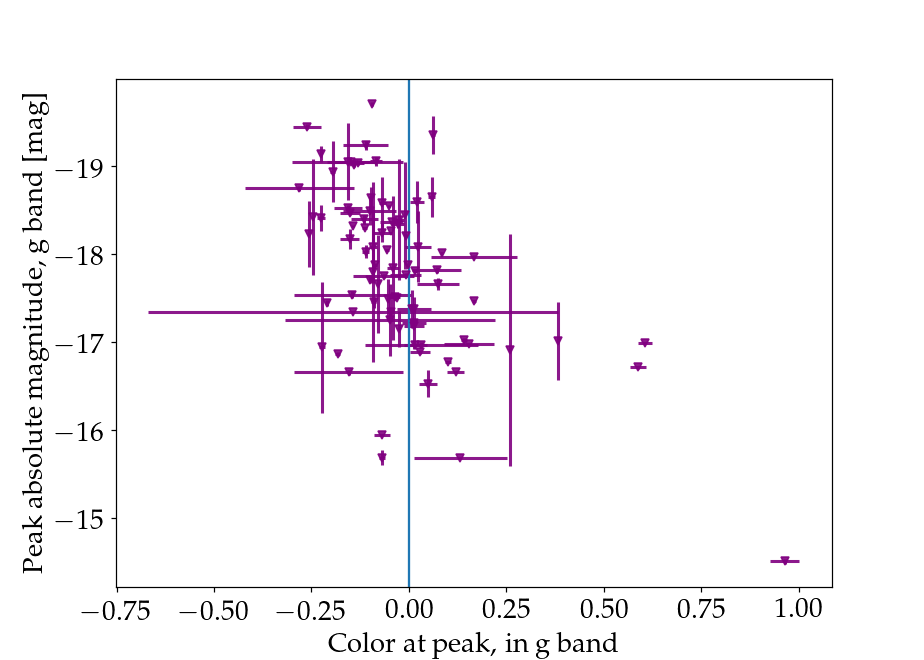

In [22]:
fig = plt.figure(figsize = (6*1.4,6))
ax  = fig.subplots(1)

ax.errorbar(colg['cpg'],colg['peakabsg'], colg['e_abspeakg'],colg['e_cpg'],
             fmt= 'v', alpha = 0.9,ms = 5 ,elinewidth=2, color = 'purple'
            )


ax.axvline(0)

plt.ylabel('Peak absolute magnitude, g band [mag]', size = 18)
plt.xlabel('Color at peak, in g band', size = 18)

# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

## Flashers vs non flashers

In [6]:
subsamp3p5 = standard_SNII[standard_SNII['Fs-Texp']<=2]

In [7]:
weak_flashers = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/tables/WeakFlasher_2dsubsample_07042022.csv')

In [8]:
weak_flashers = weak_flashers[weak_flashers['name']!='ZTF19abueupg']

In [9]:

subsamp3p5 = vstack([x for x in subsamp3p5 if x['name'] in weak_flashers['name']])

# standard_SNII_sub





In [16]:
# subsamp3p5 = subsamp3p5[(subsamp3p5['peakabsmag_g']!=99.)&(subsamp3p5['peakabsmag_r']!=99.)]

In [10]:
subsamp3p5

<Table length=17>
    name     rach-classification ...    climb_time_r       climb_time_g  
   str12            str10        ...      float64            float64     
------------ ------------------- ... ------------------ -----------------
ZTF18abckutn               SN II ...  9.330205161421391 6.232506273806587
ZTF18abdbysy               SN II ... 10.821940937539091  7.09928796409179
ZTF18abeajml               SN II ...  6.572604715042432 4.575926693168947
ZTF18abgqvwv               SN II ... 14.424816825463473  4.47988680579762
ZTF18abokyfk               SN II ...  10.31568752100516 6.276399839859646
ZTF18abwlsoi               SN II ...  4.868515110202693 3.165895028481702
ZTF18acqwdla               SN II ...               99.0              99.0
ZTF19abqhobb               SN II ...  7.833160915760206 4.327674459143019
ZTF19acryurj               SN II ...  8.863190847760377 9.130079328154752
ZTF20aasijew               SN II ...               99.0              99.0
ZTF20abfcdkj               SN II ...  11.62110115953528 6.141094110446522
ZTF20ablygyy               SN II ...  7.190677980323218 4.608315096647424
ZTF20abqkaoc               SN II ...               99.0              99.0
ZTF20abqwkxs               SN II ...   4.95901176473825 2.435593317404531
ZTF20abxyjtx               SN II ...               99.0              99.0
ZTF20acfdmex               SN II ...  10.10934718583829 4.414348290407204
ZTF20acuaqlf               SN II ...  14.51984531190703 5.803853781945589

In [11]:
flash = subsamp3p5[(subsamp3p5['Flasher']=='yes')|(subsamp3p5['Flasher']=='yes?')]

In [12]:
noflash = subsamp3p5[subsamp3p5['Flasher']=='no']

In [20]:
colgflash = vstack([x for x in colg if x['name'] in flash['name']])

In [21]:
colgnflash = vstack([x for x in colg if x['name'] in noflash['name']])

In [22]:
colgflash.colnames

['name', 'cpg', 'e_cpg', 'peakabsg', 'e_abspeakg', 'risetimeg']

<IPython.core.display.Javascript object>


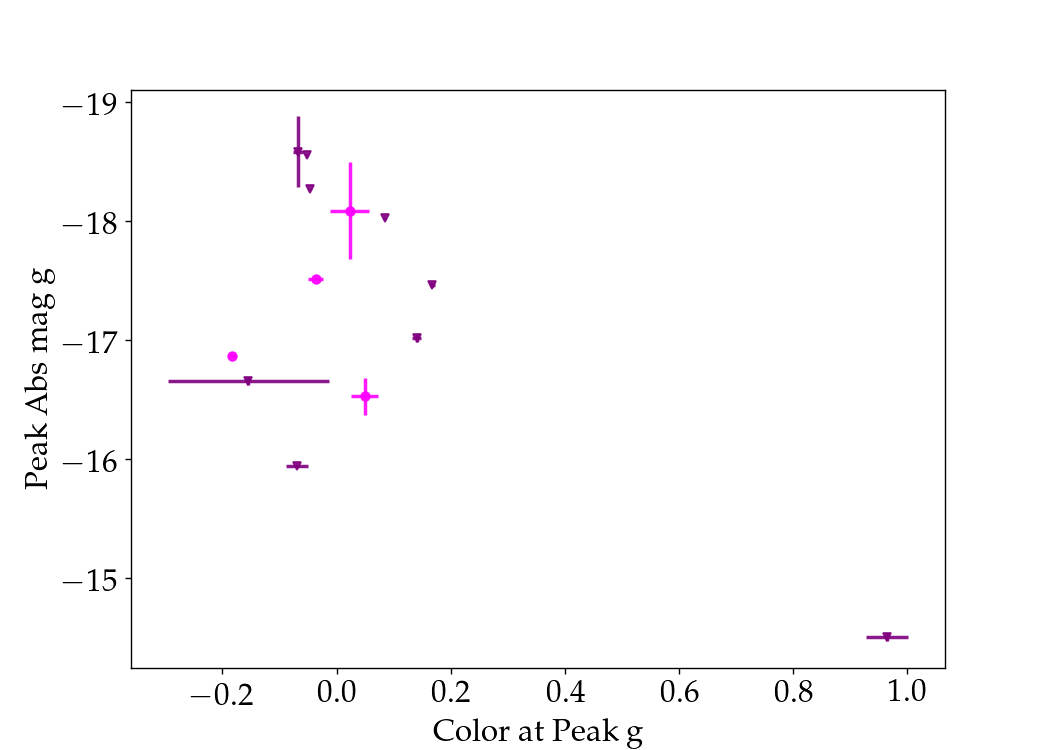

In [23]:
plt.figure(figsize = (6*1.4,6))

plt.errorbar(colgflash['cpg'],colgflash['peakabsg'], colgflash['e_abspeakg'], colgflash['e_cpg'],
             fmt= 'v', alpha = 0.9,ms = 5 ,elinewidth=2, color = 'purple'
            )

plt.errorbar(colgnflash['cpg'],colgnflash['peakabsg'], colgnflash['e_abspeakg'], colgnflash['e_cpg'], 
             fmt= 'o', alpha = 0.9,ms = 5 ,elinewidth=2, color = 'magenta'
            )


plt.xlabel('Color at Peak g', size = 18)
plt.ylabel('Peak Abs mag g', size = 18)

# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

In [20]:
abs(min(colgnflash['cpg']))+max(colgnflash['cpg'])

0.2319997256252222

In [31]:
abs(min(colgflash['cpg']))+max(colgflash['cpg'])

1.118484032671077

In [32]:
from scipy.stats import ks_2samp

ks_2samp(colgflash['cpg'], colgnflash['cpg'])

Ks_2sampResult(statistic=0.4444444444444444, pvalue=0.5174825174825175)

<IPython.core.display.Javascript object>


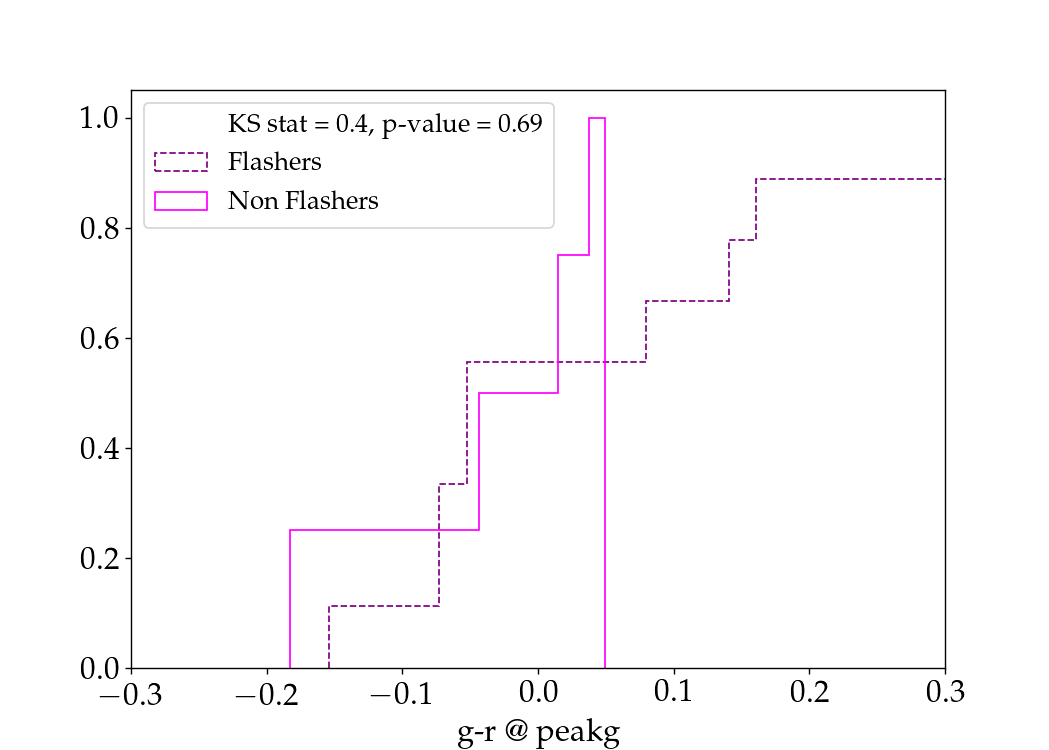

In [35]:
plt.figure(figsize = (6*1.4,6))
plt.hist(colgflash['cpg'], bins = 110, cumulative = True, density = True,histtype='step',color = 'purple', ls = '--',label = 'Flashers')
plt.hist(colgnflash['cpg'], bins = 20, cumulative = True, density = True,histtype='step',color = 'magenta', label = 'Non Flashers')

plt.plot(0,0, color = 'white', label = 'KS stat = 0.4, p-value = 0.69')

plt.xlabel('g-r @ peakg', size = 18)
plt.xlim([-0.3,0.3])
plt.legend(loc = 'upper left', fontsize = 15)

In [36]:
plt.savefig('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/figures/peak_analysis/2dsusampWF_coloratpeakg_KStest_05092022.pdf')

<IPython.core.display.Javascript object>


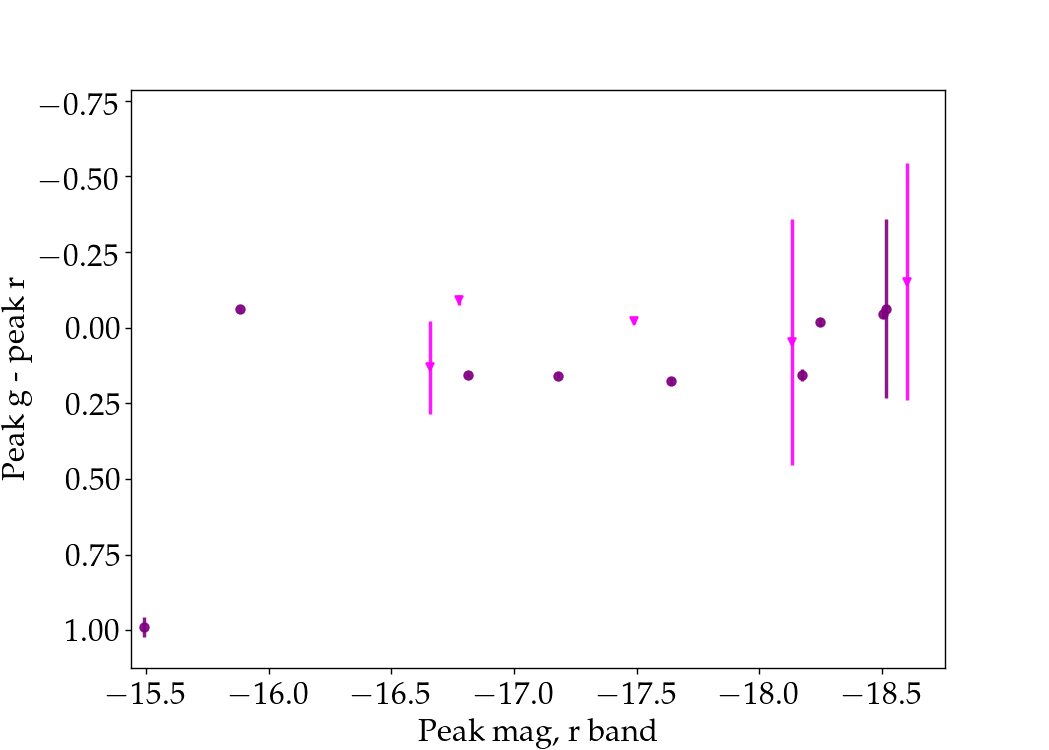

In [35]:
plt.figure(figsize = (6*1.4,6))

plt.errorbar(flash['peakabsmag_r'],flash['peakabsmag_g']-flash['peakabsmag_r'], flash['e_peakabsmag_r'], 
             fmt= 'o', alpha = 0.9,ms = 5 ,elinewidth=2, color = 'purple'
            )

plt.errorbar(noflash['peakabsmag_r'],noflash['peakabsmag_g']-noflash['peakabsmag_r'], noflash['e_peakabsmag_r'], 
             fmt= 'v', alpha = 0.9,ms = 5 ,elinewidth=2, color = 'magenta'
            )


plt.xlabel('Peak mag, r band', size = 18)
plt.ylabel('Peak g - peak r', size = 18)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

<IPython.core.display.Javascript object>


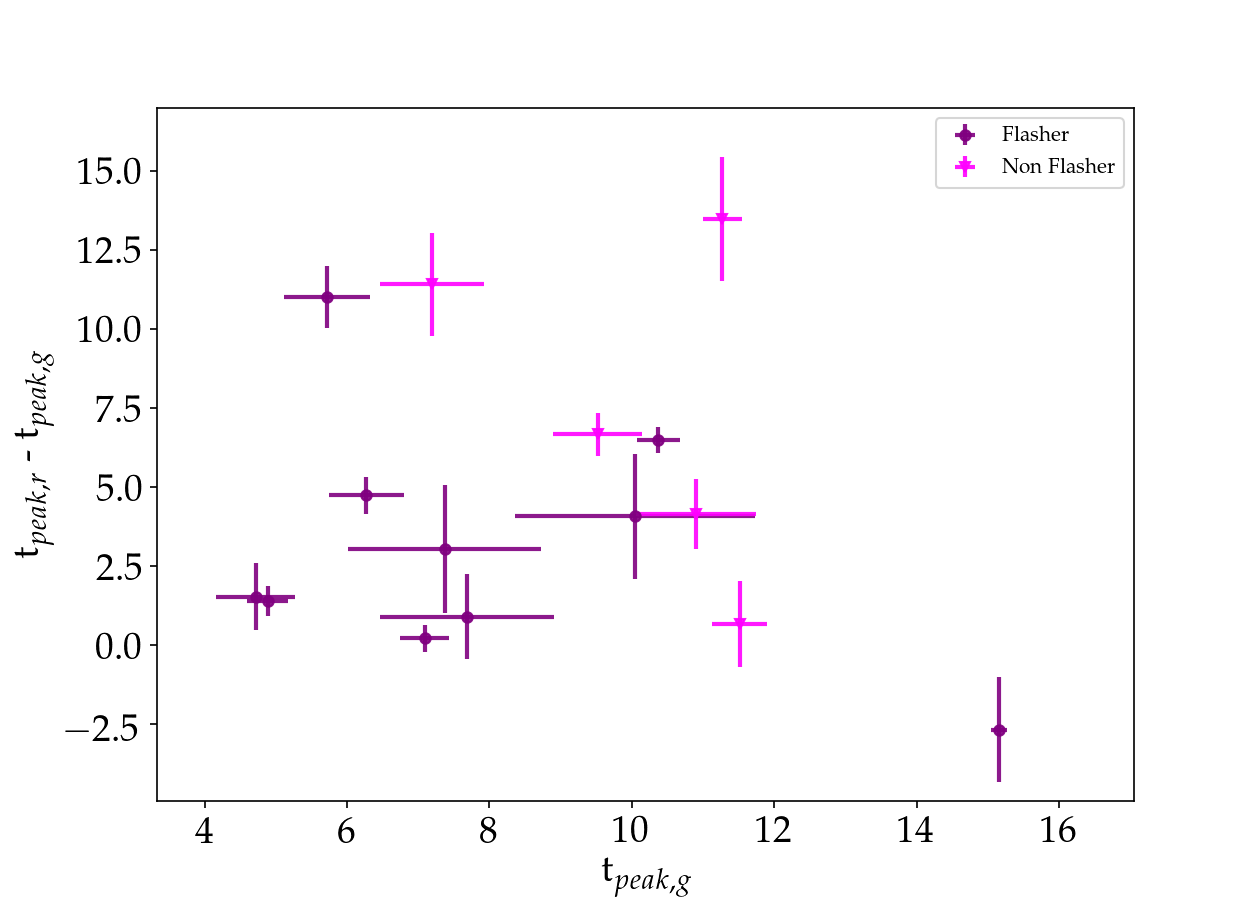

In [27]:
plt.figure(figsize = (6*1.4,6))

plt.errorbar(flash['peakday_g'],flash['peakday_r']-flash['peakday_g'],
             np.sqrt(flash['e_peakday_g']**2+flash['e_peakday_r']**2),flash['e_peakday_g'], 
             fmt= 'o', alpha = 0.9,ms = 5 ,elinewidth=2, color = 'purple', label = 'Flasher'
            )

plt.errorbar(noflash['peakday_g'],noflash['peakday_r']-noflash['peakday_g'], 
             np.sqrt(noflash['e_peakday_g']**2+noflash['e_peakday_r']**2),noflash['e_peakday_g'], 
             fmt= 'v', alpha = 0.9,ms = 5 ,elinewidth=2, color = 'magenta', label = 'Non Flasher'
            )


plt.xlabel('t$_{peak,g}$', size = 18)
plt.ylabel('t$_{peak,r}$ - t$_{peak,g}$', size = 18)
plt.legend()
# plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()

In [42]:
plt.savefig('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/figures/peak_analysis/tpr-tpg_vs_tpg_2ss.pdf')

<IPython.core.display.Javascript object>


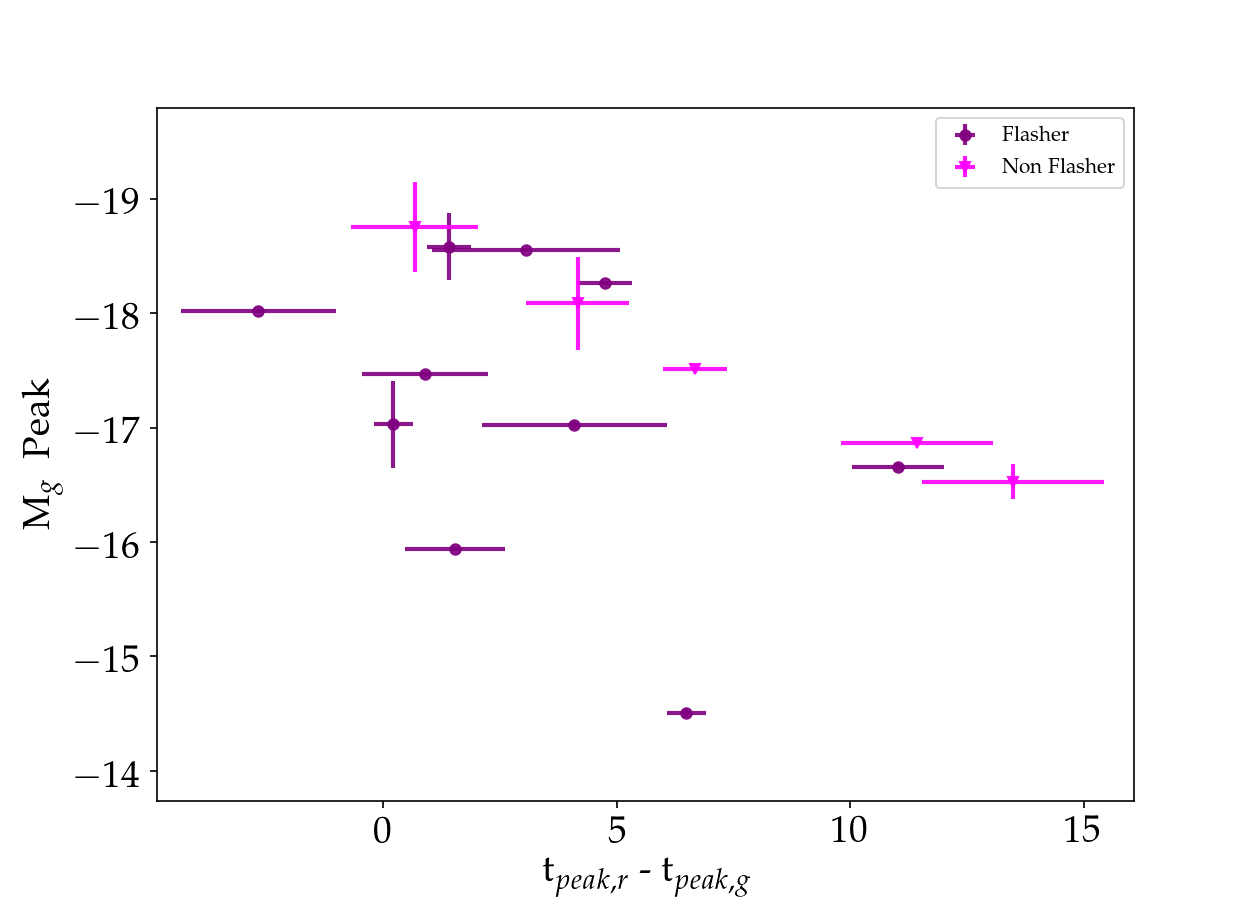

In [28]:
plt.figure(figsize = (6*1.4,6))

plt.errorbar(flash['peakday_r']-flash['peakday_g'],flash['peakabsmag_g'],
             flash['e_peakabsmag_g'], np.sqrt(flash['e_peakday_g']**2+flash['e_peakday_r']**2),
             fmt= 'o', alpha = 0.9,ms = 5 ,elinewidth=2, color = 'purple', label = 'Flasher'
            )

plt.errorbar(noflash['peakday_r']-noflash['peakday_g'], noflash['peakabsmag_g'],
            noflash['e_peakabsmag_g'], np.sqrt(noflash['e_peakday_g']**2+noflash['e_peakday_r']**2), 
             fmt= 'v', alpha = 0.9,ms = 5 ,elinewidth=2, color = 'magenta', label = 'Non Flasher'
            )


plt.xlabel('t$_{peak,r}$ - t$_{peak,g}$', size = 18)
plt.ylabel('M$_{g}$ \@ Peak', size = 18)
plt.legend()
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

In [47]:
plt.savefig('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/figures/peak_analysis/PAMg_vs_tpr-tpg_2ss.pdf')

In [ ]:
plt.figure(figsize = (6*np.sqrt(2),6))



plt.errorbar(colgflash[''],colgflash['cpg'],colgflash['e_cpg'],colgflash['e_abspeakg'],
            fmt= 'o', alpha = 0.9,ms = 5 ,elinewidth=2, color = 'purple', label = 'Flasher')

plt.errorbar(colgnflash['peakabsg'],colgnflash['cpg'],colgnflash['e_cpg'],colgnflash['e_abspeakg'],
            fmt= 'v', alpha = 0.9,ms = 5 ,elinewidth=2, color = 'magenta', label = 'Non Flasher')


# corr_a,_ = pearsonr(r_dec['a'],g_dec['a']) 
# plt.plot(0, 0, label = f'PC_f = {corr_a}', color='white' )

# plt.axhline(0)
# plt.legend()

plt.gca().invert_xaxis()

plt.xlabel('Peak Absolute Magnitude, g band', size = 18)
plt.ylabel('g-r @ peak', size = 18)
plt.legend()


<IPython.core.display.Javascript object>


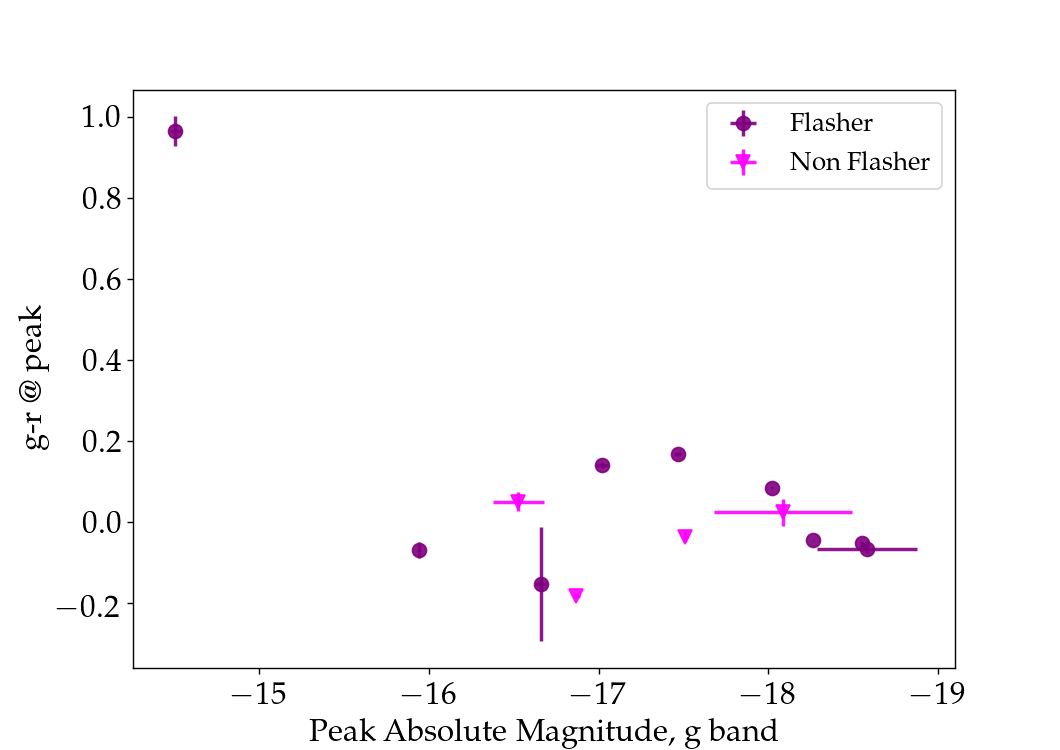

In [30]:
plt.figure(figsize = (6*np.sqrt(2),6))



plt.errorbar(colgflash['peakabsg'],colgflash['cpg'],colgflash['e_cpg'],colgflash['e_abspeakg'],
            fmt= 'o', alpha = 0.9,ms = 8 ,elinewidth=2, color = 'purple', label = 'Flasher')

plt.errorbar(colgnflash['peakabsg'],colgnflash['cpg'],colgnflash['e_cpg'],colgnflash['e_abspeakg'],
            fmt= 'v', alpha = 0.9,ms = 8 ,elinewidth=2, color = 'magenta', label = 'Non Flasher')


# corr_a,_ = pearsonr(r_dec['a'],g_dec['a']) 
# plt.plot(0, 0, label = f'PC_f = {corr_a}', color='white' )

# plt.axhline(0)
# plt.legend()

plt.gca().invert_xaxis()

plt.xlabel('Peak Absolute Magnitude, g band', size = 18)
plt.ylabel('g-r @ peak', size = 18)
plt.legend(fontsize = 15)


In [31]:
plt.savefig('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/figures/peak_analysis/2dsubsampWF_coloratpeakg_flashnflash_05092022.pdf')

<IPython.core.display.Javascript object>


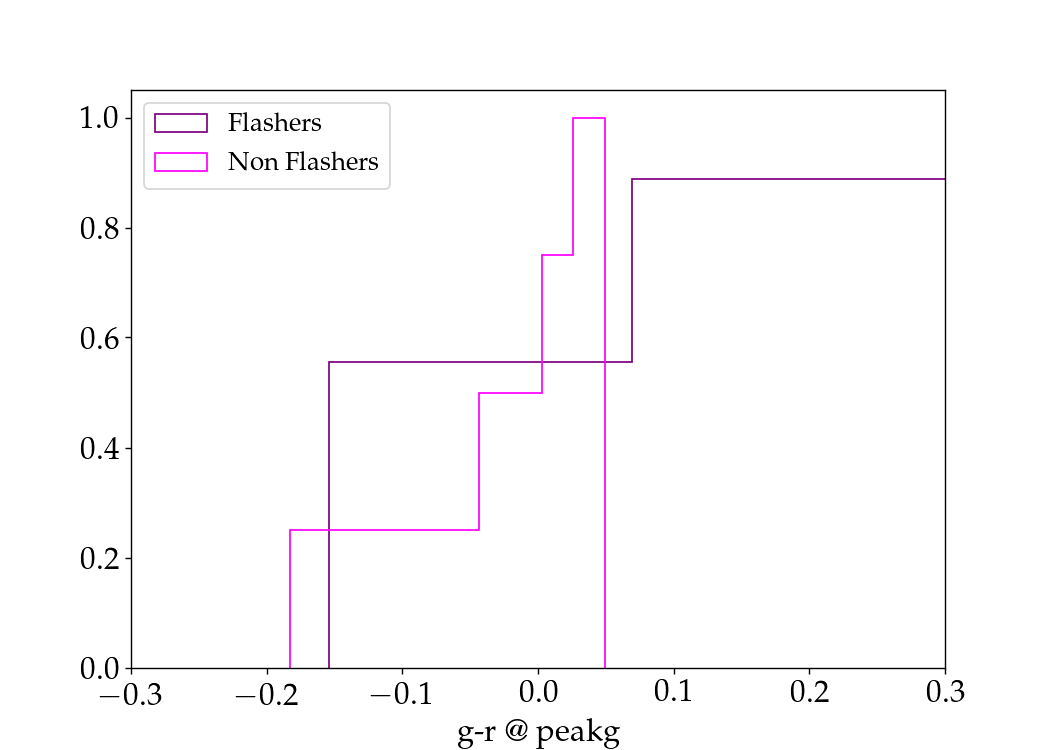

In [28]:
plt.figure(figsize = (6*1.4,6))
plt.hist(colgflash['cpg'], bins = 10, cumulative = True, density = True,histtype='step',color = 'purple', label = 'Flashers')
plt.hist(colgnflash['cpg'], bins = 10, cumulative = True, density = True,histtype='step',color = 'magenta', label = 'Non Flashers')

plt.xlabel('g-r @ peakg', size = 18)
plt.xlim([-0.3,0.3])
plt.legend(loc = 'upper left', fontsize = 15)

In [29]:
plt.savefig('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/figures/peak_analysis/cumulativecheck_coloratpeakg_flashnflash_2ss.pdf')

In [39]:
from scipy.stats import ks_2samp

In [31]:
ks_2samp(colgflash['cpg'], colgnflash['cpg'])

Ks_2sampResult(statistic=0.4, pvalue=0.6873126873126874)

# The color LC 

In [28]:
color_lc = '/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/color_evolution/results_full_lc/'

In [29]:
table_infants  = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/tables/RISNeIIfull_radeczeztexpflashpeakclimb_15022022.csv')

In [30]:
santard_SNII = table_infants[(table_infants['rach-classification']=='SN II')&(table_infants['Fs-Texp']<=2)]

In [31]:


flasher      = santard_SNII[(santard_SNII['Flasher']=='yes')|(santard_SNII['Flasher']=='yes?')]
nonflasher   = santard_SNII[(santard_SNII['Flasher']=='no')]

In [38]:
flasher

<Table length=11>
    name     rach-classification ...    climb_time_r       climb_time_g  
   str12            str10        ...      float64            float64     
------------ ------------------- ... ------------------ -----------------
ZTF18abdbysy               SN II ... 10.821940937539091  7.09928796409179
ZTF18abeajml               SN II ...  6.572604715042432 4.575926693168947
ZTF18abgqvwv               SN II ... 14.424816825463473  4.47988680579762
ZTF18abokyfk               SN II ...  10.31568752100516 6.276399839859646
ZTF18abwlsoi               SN II ...  4.868515110202693 3.165895028481702
ZTF19abqhobb               SN II ...  7.833160915760206 4.327674459143019
ZTF19abueupg               SN II ...  6.125237700242728 5.283687875084523
ZTF19acryurj               SN II ...  8.863190847760377 9.130079328154752
ZTF20ablygyy               SN II ...  7.190677980323218 4.608315096647424
ZTF20abqwkxs               SN II ...   4.95901176473825 2.435593317404531
ZTF20abxyjtx               SN II ...               99.0              99.0

In [10]:
# for _ in santard_SNII['name']: 
# #     print(_)
#     color     = _ + '_colorev'
    
#     try: 
#         globals()[color] = ascii.read(color_lc+_+'_fullLC_colorev.csv', delimiter=',')
#     except FileNotFoundError:
#         print(f'No color LC for {_}')
        
    

# color_LC = [ x for x in globals() if str(x).startswith('ZTF') ]




In [32]:
for _ in flasher['name']: 
#     print(_)
    color     = _ + '_colorev_flash'
    
    try: 
        globals()[color] = ascii.read(color_lc+_+'_fullLC_colorev.csv', delimiter=',')
    except FileNotFoundError:
        print(f'No color LC for {_}')
        
    
LC = [ x for x in globals() if str(x).startswith('ZTF') ]
color_LC_flasher = [ x for x in LC if str(x).split('_')[2]=='flash' ]




No color LC for ZTF20abxyjtx


In [33]:
for _ in nonflasher['name']: 
#     print(_)
    color     = _ + '_colorev_nonflash'
    
    try: 
        globals()[color] = ascii.read(color_lc+_+'_fullLC_colorev.csv', delimiter=',')
    except FileNotFoundError:
        print(f'No color LC for {_}')
        
    
LC = [ x for x in globals() if str(x).startswith('ZTF') ]
color_LC_nonflasher = [ x for x in LC if str(x).split('_')[2]=='nonflash' ]




No color LC for ZTF18acqwdla
No color LC for ZTF20aasijew
No color LC for ZTF20abqkaoc


## Flashers relative to Peak g time

<IPython.core.display.Javascript object>


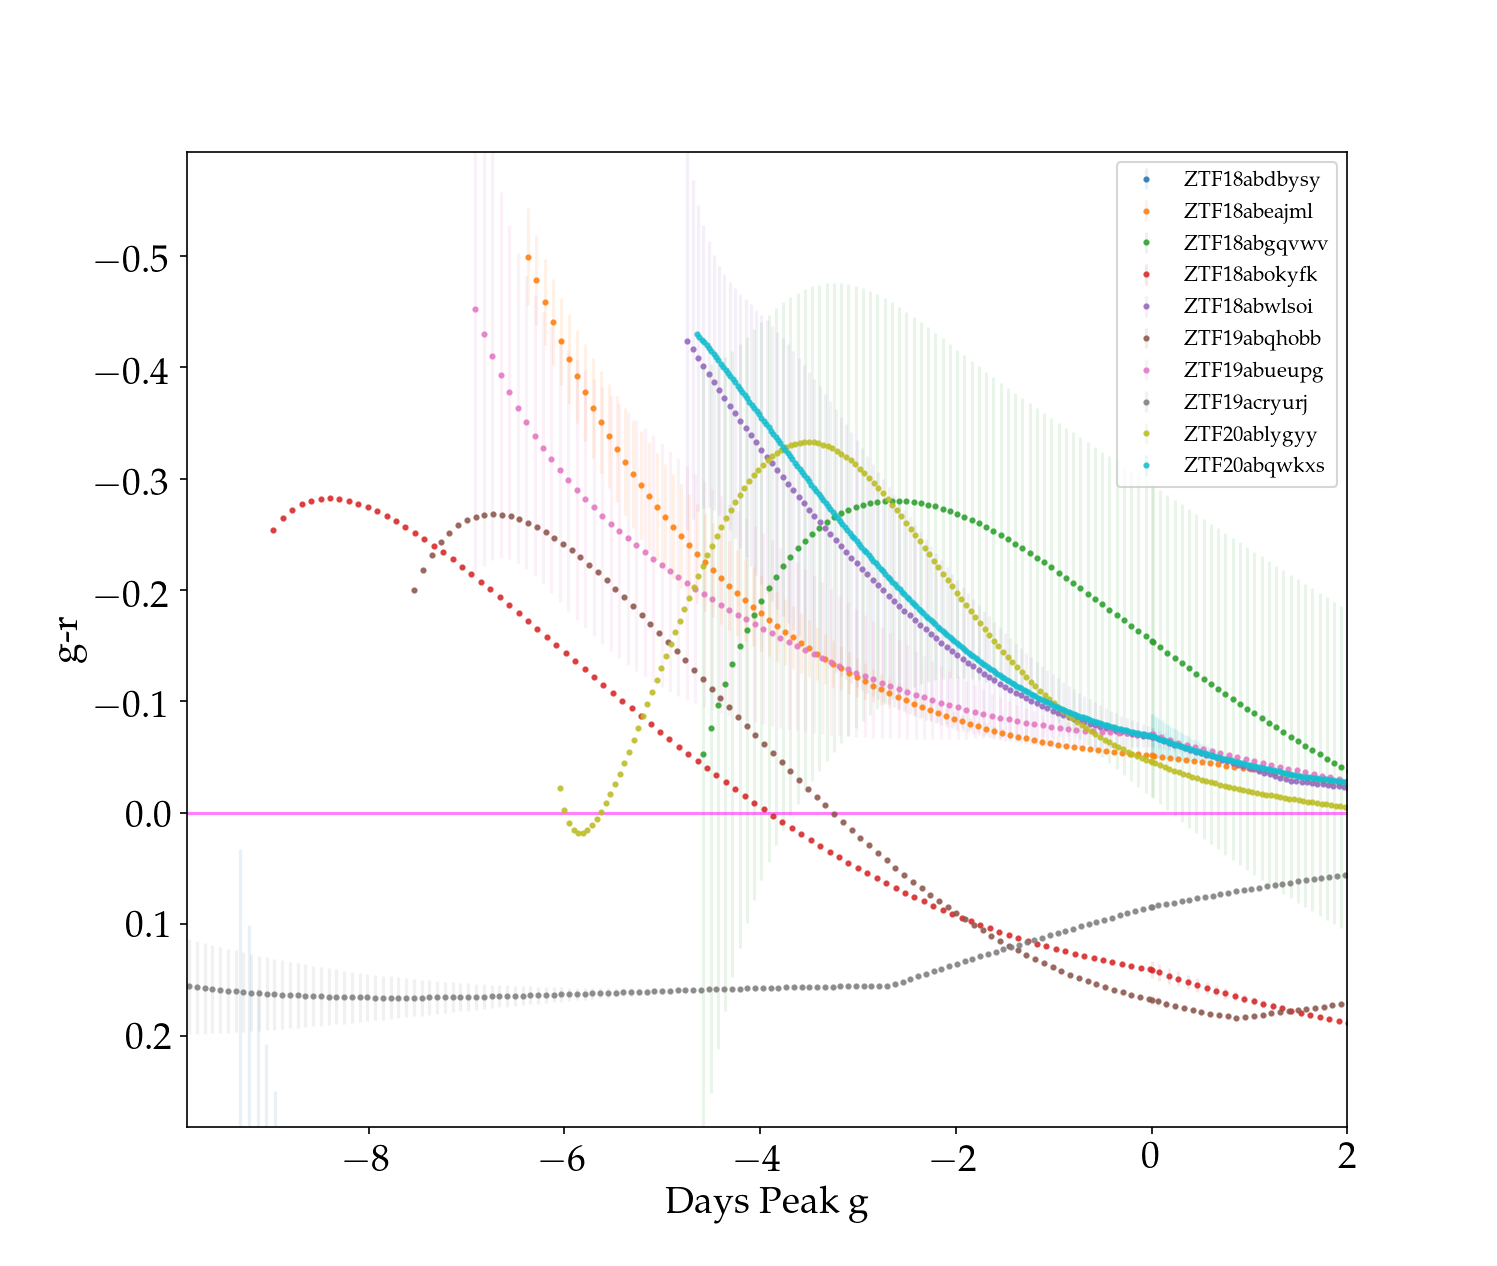

In [69]:
fig0,ax0 = plt.subplots()

# i = 0

for _ in color_LC_flasher:
    
    temptab = flasher[flasher['name']==_.split('_')[0]]
    
    lc_r = eval(_)

    if len(lc_r) != 0:
        
#         label_  = _.split+' '+str(lc_r['g-r'][1])
        markers, caps, bars = ax0.errorbar(lc_r['t_frompeakg'] 
                                                   , lc_r['g-r'], lc_r['e_g-r'],
                                                             fmt = 'o', ms = 2,alpha = 0.8, label = _.split('_')[0] )
        [bar.set_alpha(0.1) for bar in bars]
     


            
    ax0.set_ylabel('g-r', size = 18)
#     ax3.set_ylabel('Absolute Magnitude', size = 15)

plt.axhline(0,  alpha = 0.5, color = 'magenta')

plt.xlabel('Days Peak g', size = 18)
plt.xlim([-10,2])

plt.legend()
plt.gca().invert_yaxis()

In [71]:
infant_flasher_table = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/tables/RISNeIIflasherst_21032022.csv', delimiter = ',')

In [72]:
for _ in color_LC_flasher:
    
    temptab = infant_flasher_table[infant_flasher_table['name']==_.split('_')[0]]
    
    lc_r = eval(_)
    
    lc_r['t_from_EED'] = lc_r['t_frompeakg'] + temptab['peakday_g']
    
    

In [106]:
infant_flasher_table.colnames

['name',
 'rach-classification',
 'Flasher',
 'classification',
 'First Detection',
 'Last Non Detection',
 'First Spectrum',
 'instrument-fs',
 'fD-lND',
 'fS-lND',
 'ra_med',
 'dec_med',
 'redshift',
 'e_redshift',
 'z_ref',
 'jd-redshift',
 'instrument-redshift',
 'UV',
 'host',
 'host_type',
 'P-cygni',
 'jd-pcyg',
 'instrument-pcyg',
 't_exp',
 'e_t_exp',
 'jd_t_exp',
 'Fs-Texp',
 'peakabsmag_r',
 'e_peakabsmag_r',
 'peakday_r',
 'e_peakday_r',
 'peakabsmag_g',
 'e_peakabsmag_g',
 'peakday_g',
 'e_peakday_g',
 'decline_r',
 'e_decline_r',
 'decline_g',
 'e_decline_g',
 'climb_time_r',
 'climb_time_g',
 'jd_last_flash',
 'jd_no_flash',
 'jd_flash_end',
 'flash_timescale',
 'e_flash_timescale']

In [218]:
infant_flasher_table['name','jd_t_exp','jd_last_flash','flash_timescale','e_flash_timescale','peakday_r'].show_in_notebook()

## Flashers relative to EED

<IPython.core.display.Javascript object>


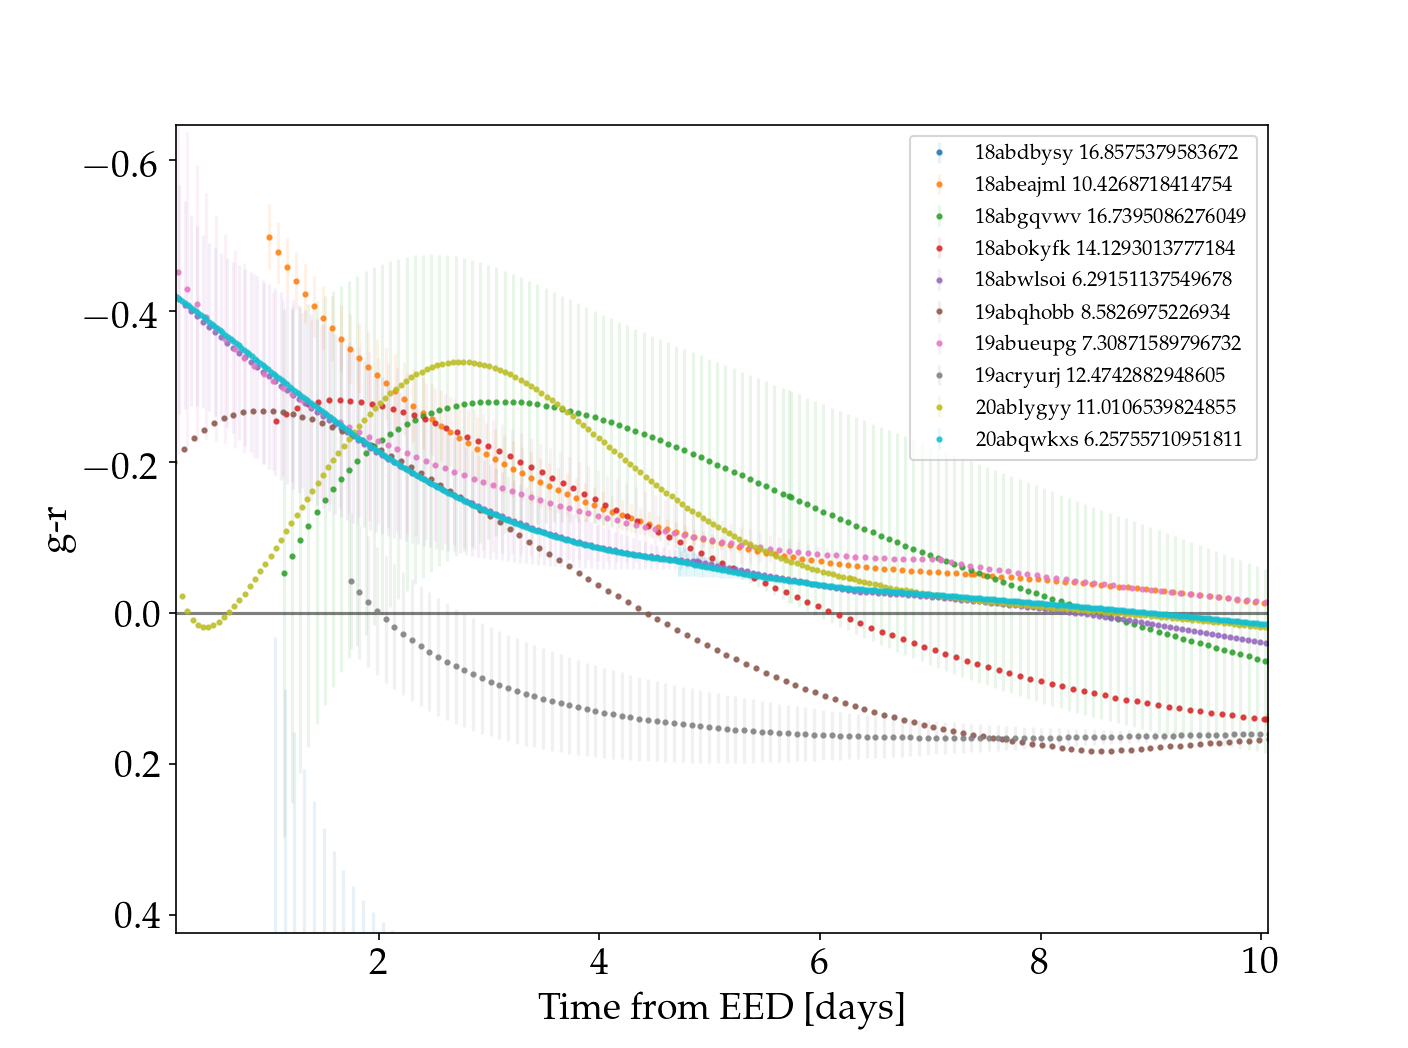

In [219]:
fig0,ax0 = plt.subplots()

# i = 0

for _ in color_LC_flasher:
    
    temptab = infant_flasher_table[infant_flasher_table['name']==_.split('_')[0]]
    
    lc_r = eval(_)
    
    labelstr = _.split('_')[0][3:] + ' ' + str(temptab['peakday_r'][0])
    

    if len(lc_r) != 0:
        
#         label_  = _.split+' '+str(lc_r['g-r'][1])
        markers, caps, bars = ax0.errorbar(lc_r['t_from_EED'] 
                                                   , lc_r['g-r'], lc_r['e_g-r'],
                                                             fmt = 'o', ms = 2,alpha = 0.8, label = labelstr )
        [bar.set_alpha(0.1) for bar in bars]
     


            
    ax0.set_ylabel('g-r', size = 18)
#     ax3.set_ylabel('Absolute Magnitude', size = 15)

plt.axhline(0,  alpha = 0.5, color = 'black')

plt.xlabel('Time from EED [days]', size = 18)
plt.xlim([0,15])

plt.legend()
plt.gca().invert_yaxis()

In [94]:
plt.savefig('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/figures/color_ev/onlyflash_colorev.pdf')

<Table length=11>
    name     rach-classification ...    climb_time_r       climb_time_g  
   str12            str10        ...      float64            float64     
------------ ------------------- ... ------------------ -----------------
ZTF18abdbysy               SN II ... 10.821940937539091  7.09928796409179
ZTF18abeajml               SN II ...  6.572604715042432 4.575926693168947
ZTF18abgqvwv               SN II ... 14.424816825463473  4.47988680579762
ZTF18abokyfk               SN II ...  10.31568752100516 6.276399839859646
ZTF18abwlsoi               SN II ...  4.868515110202693 3.165895028481702
ZTF19abqhobb               SN II ...  7.833160915760206 4.327674459143019
ZTF19abueupg               SN II ...  6.125237700242728 5.283687875084523
ZTF19acryurj               SN II ...  8.863190847760377 9.130079328154752
ZTF20ablygyy               SN II ...  7.190677980323218 4.608315096647424
ZTF20abqwkxs               SN II ...   4.95901176473825 2.435593317404531
ZTF20abxyjtx               SN II ...               99.0              99.0

 ## Non flashers relative to EED

In [76]:
for _ in color_LC_nonflasher:
    
    temptab = nonflasher[nonflasher['name']==_.split('_')[0]]
    
    lc_r = eval(_)
    
    lc_r['t_from_EED'] = lc_r['t_frompeakg'] + temptab['peakday_g']
    
    

In [86]:
# fig0,ax0 = plt.subplots()

# # i = 0

# for _ in color_LC_nonflasher:
    
#     temptab = nonflasher[nonflasher['name']==_.split('_')[0]]
    
#     lc_r = eval(_)

#     if len(lc_r) != 0:
# #         label_  = _.split+' '+str(lc_r['g-r'][1])
#         markers, caps, bars = ax0.errorbar(lc_r['t_frompeakg'] 
#                                                    , lc_r['g-r'], lc_r['e_g-r'],
#                                                              fmt = 'o', ms = 2,alpha = 0.8)
#         [bar.set_alpha(0.1) for bar in bars]
            
#     ax0.set_ylabel('g-r', size = 15)
# #     ax3.set_ylabel('Absolute Magnitude', size = 15)

# plt.xlabel('Days Peak g', size = 15)
# plt.xlim([-10,2])

# # plt.legend()
# plt.gca().invert_yaxis()

<IPython.core.display.Javascript object>


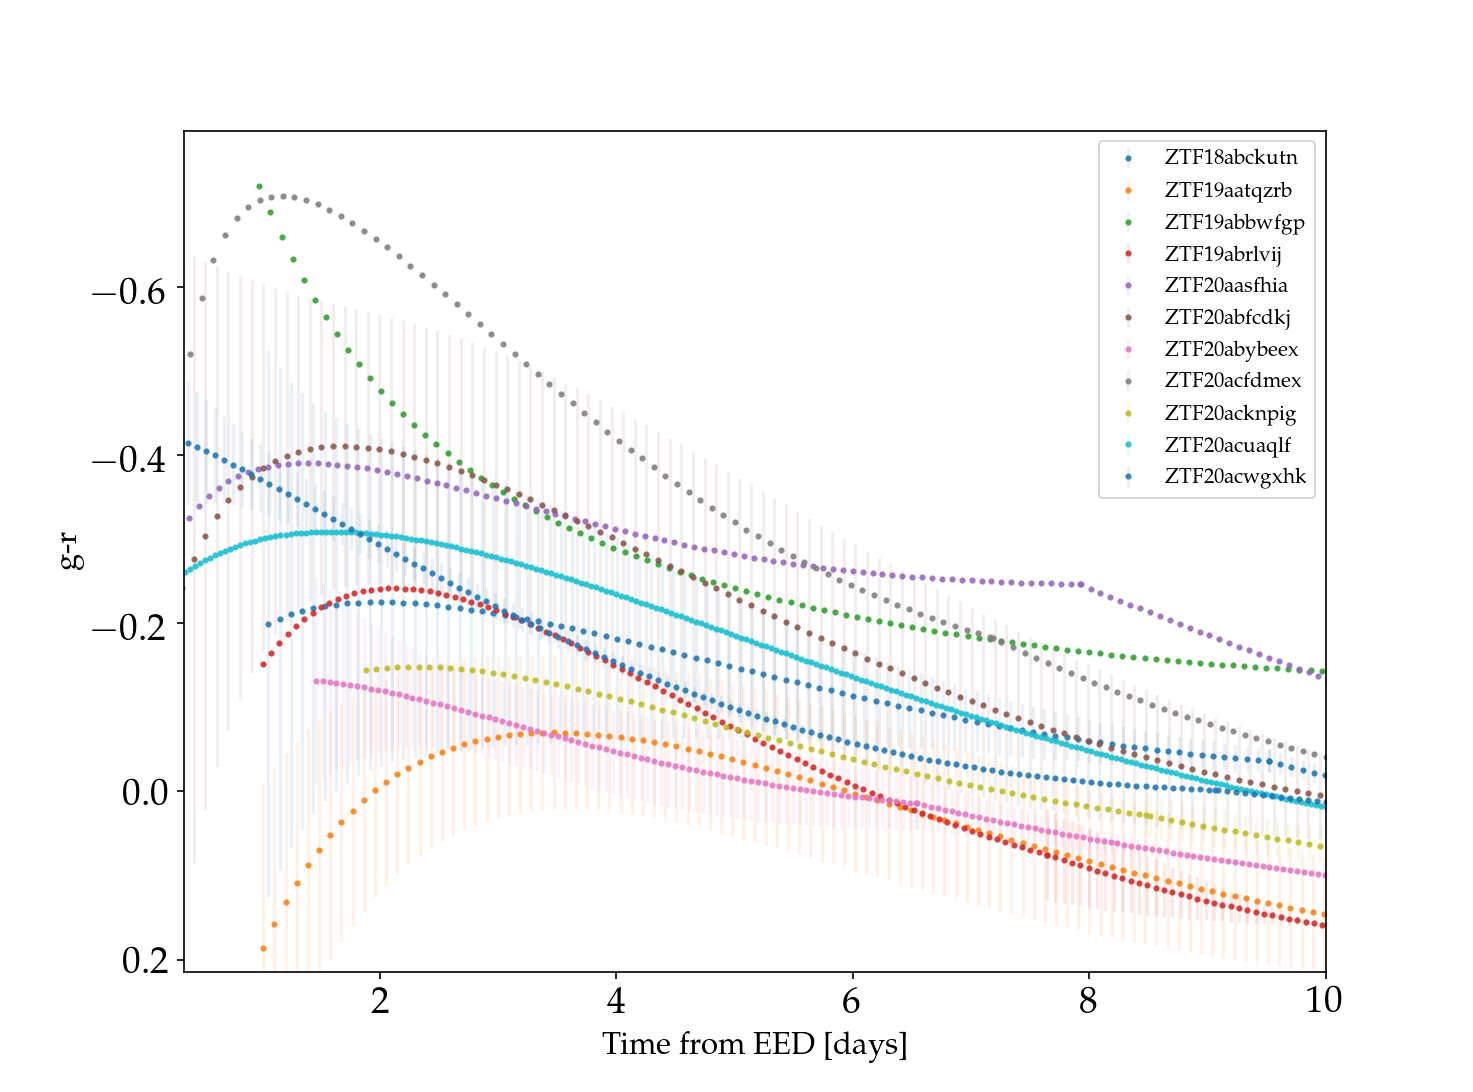

In [98]:
fig0,ax0 = plt.subplots()

# i = 0

for _ in color_LC_nonflasher:
    
    temptab = nonflasher[nonflasher['name']==_.split('_')[0]]
    
    lc_r = eval(_)

    if len(lc_r) != 0:
#         label_  = _.split+' '+str(lc_r['g-r'][1])
        markers, caps, bars = ax0.errorbar(lc_r['t_from_EED'] 
                                                   , lc_r['g-r'], lc_r['e_g-r'],
                                                             fmt = 'o', ms = 2,alpha = 0.8, label = _.split('_')[0])
        [bar.set_alpha(0.1) for bar in bars]
            
    ax0.set_ylabel('g-r', size = 15)
#     ax3.set_ylabel('Absolute Magnitude', size = 15)

plt.xlabel('Time from EED [days]', size = 15)
plt.xlim([0,10])

plt.legend()
plt.gca().invert_yaxis()

# Looking at color evolution for until day 10

In [54]:
def mad(x):
    '''
    median absolute deviation defined as median(|x(i)-median(x)|)
    '''
    return np.median(abs(x-np.median(x)))

In [55]:
med_peak_flash = np.median(flasher[flasher['peakday_g']!=99.]['peakday_g'])
med_peak_nflash = np.median(nonflasher[nonflasher['peakday_g']!=99.]['peakday_g'])


mad_peak_flash = mad(flasher[flasher['peakday_g']!=99.]['peakday_g'])
mad_peak_nflash = mad(nonflasher[nonflasher['peakday_g']!=99.]['peakday_g'])

<IPython.core.display.Javascript object>


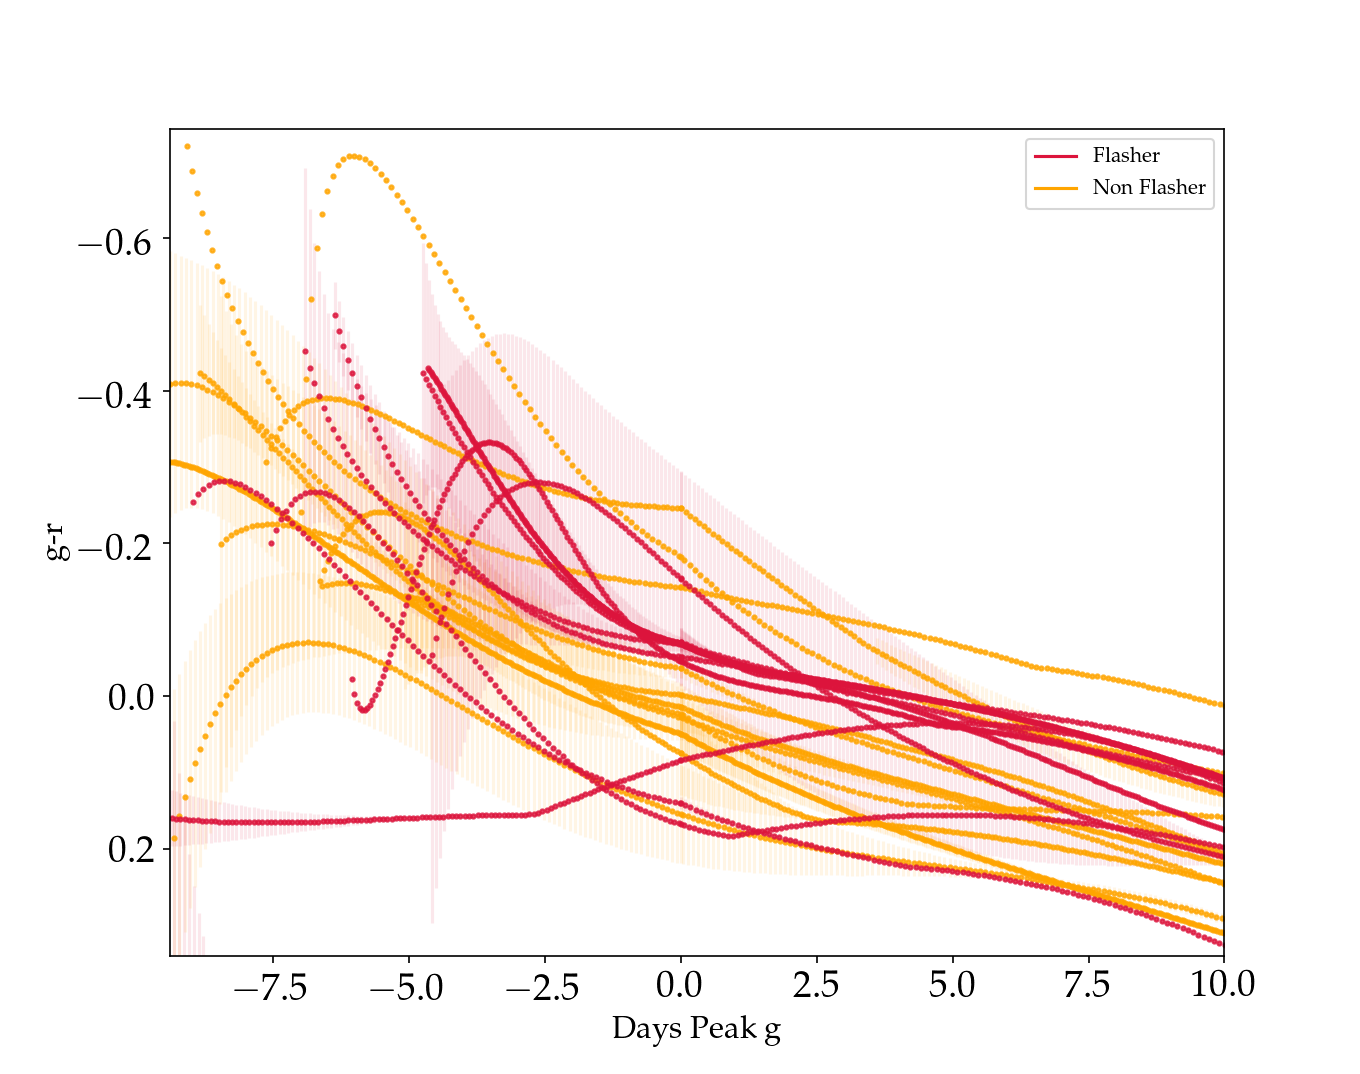

In [64]:
# trying to mix the two? 



fig0,ax0 = plt.subplots()

# i = 0

for _ in color_LC_nonflasher:
    
    temptab = nonflasher[nonflasher['name']==_.split('_')[0]]
    
    lc_r = eval(_)

    if len(lc_r) != 0:
#         label_  = _.split+' '+str(lc_r['g-r'][1])
        markers, caps, bars = ax0.errorbar(lc_r['t_frompeakg'] 
                                                   , lc_r['g-r'], lc_r['e_g-r'],
                                                             fmt = 'o', ms = 2,alpha = 0.8, color = 'orange')
        [bar.set_alpha(0.1) for bar in bars]
            
    ax0.set_ylabel('g-r', size = 15)

    

for _ in color_LC_flasher:
    
    temptab = flasher[flasher['name']==_.split('_')[0]]
    
    lc_r = eval(_)

    if len(lc_r) != 0:
        
#         label_  = _.split+' '+str(lc_r['g-r'][1])
        markers, caps, bars = ax0.errorbar(lc_r['t_frompeakg'] 
                                                   , lc_r['g-r'], lc_r['e_g-r'],
                                                             fmt = 'o', ms = 2,alpha = 0.8, color = 'crimson')
        [bar.set_alpha(0.1) for bar in bars]
         

            
# plt.axvline(-med_peak_flash, color = 'crimson')
# plt.axvline(-med_peak_nflash, color = 'orangered')

# plt.text(-med_peak_flash+0.5, 2, f'$t_p = {med_peak_flash:.3f} \pm {mad_peak_flash:.3f}$ d', rotation = 90, color = 'crimson', size = 15)
# plt.text(-med_peak_nflash+0.5, 2, f'$t_p = {med_peak_nflash:.3f} \pm {mad_peak_nflash:.3f}$ d', rotation = 90, color = 'orangered', size = 15)
plt.plot(-20,20,color = 'crimson', label = 'Flasher')
plt.plot(-20,20,color = 'orange', label = 'Non Flasher')
    

plt.xlabel('Days Peak g', size = 15)
plt.xlim([-10,10])

plt.legend()
plt.gca().invert_yaxis()


In [65]:
plt.savefig('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/figures/color_ev/f_nf_colorev.pdf')

In [ ]:
for _ in color_LC_nonflasher:
    
    temptab = nonflasher[nonflasher['name']==_.split('_')[0]]
    
    lc_r = eval(_)

    if len(lc_r) != 0:
#         label_  = _.split+' '+str(lc_r['g-r'][1])
        markers, caps, bars = ax0.errorbar(lc_r['t_from_EED'] 
                                                   , lc_r['g-r'], lc_r['e_g-r'],
                                                             fmt = 'o', ms = 2,alpha = 0.8, color = 'orange')
        [bar.set_alpha(0.1) for bar in bars]
            
    ax0.set_ylabel('g-r', size = 18)

    

for _ in color_LC_flasher:
    
    temptab = flasher[flasher['name']==_.split('_')[0]]
    
    lc_r = eval(_)

    if len(lc_r) != 0:
        
#         label_  = _.split+' '+str(lc_r['g-r'][1])
        markers, caps, bars = ax0.errorbar(lc_r['t_from_EED'] 
                                                   , lc_r['g-r'], lc_r['e_g-r'],
                                                             fmt = 'o', ms = 2,alpha = 0.8, color = 'crimson')
        [bar.set_alpha(0.1) for bar in bars]
         


## g-r vs time from EED for both flashers and non flashers

<IPython.core.display.Javascript object>


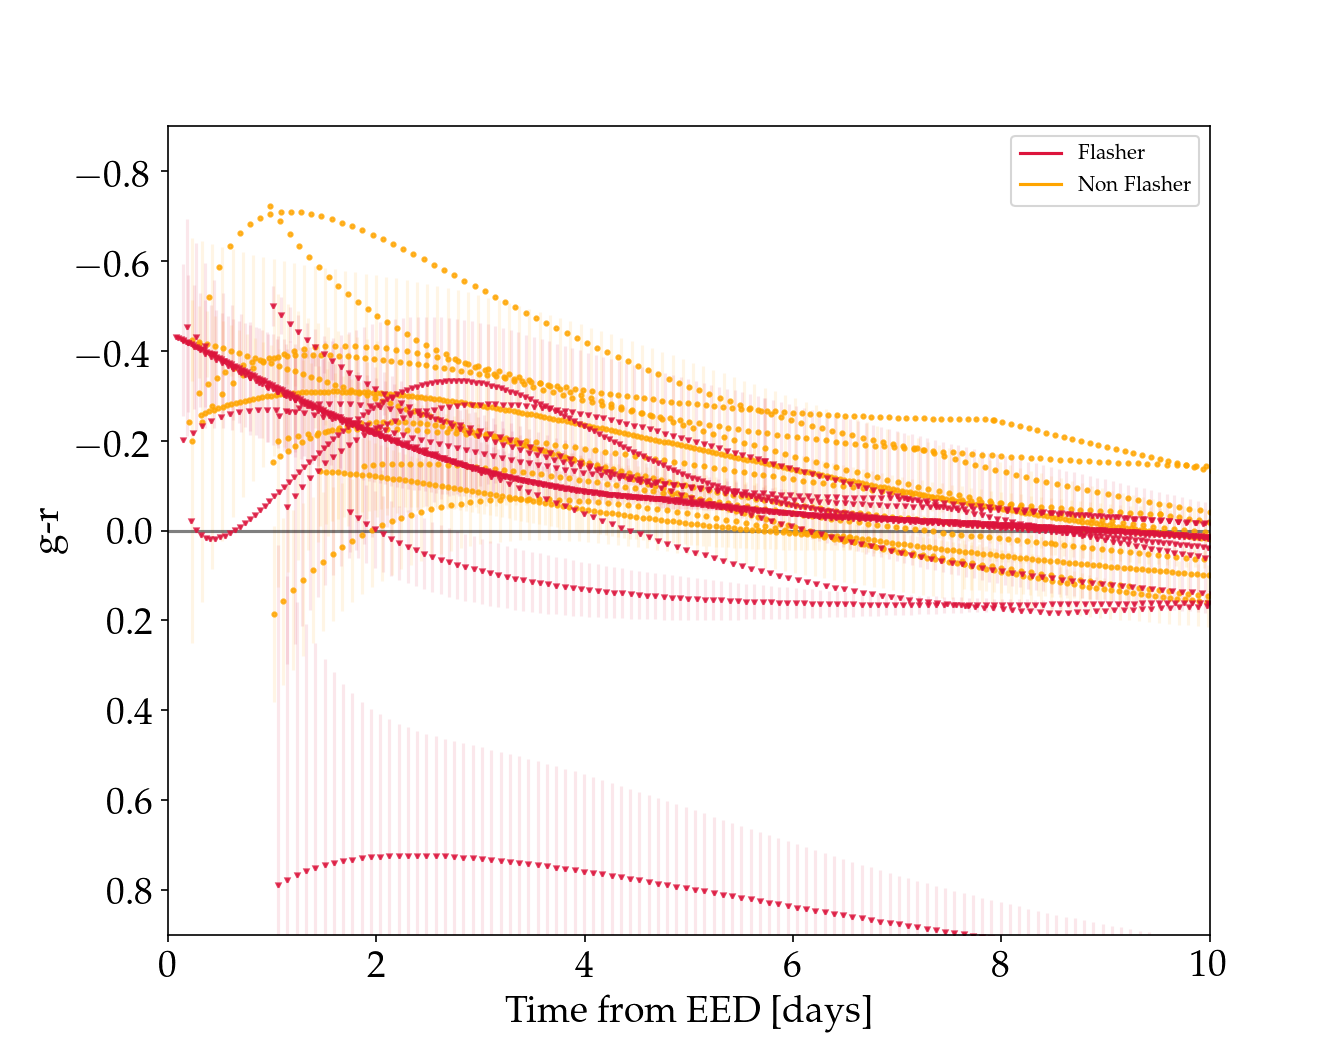

In [217]:



fig0,ax0 = plt.subplots()

# i = 0

for _ in color_LC_nonflasher:
    
    temptab = nonflasher[nonflasher['name']==_.split('_')[0]]
    
    lc_r = eval(_)

    if len(lc_r) != 0:
#         label_  = _.split+' '+str(lc_r['g-r'][1])
        markers, caps, bars = ax0.errorbar(lc_r['t_from_EED'] 
                                                   , lc_r['g-r'], lc_r['e_g-r'],
                                                             fmt = 'o', ms = 2,alpha = 0.8, color = 'orange')
        [bar.set_alpha(0.1) for bar in bars]
            
    ax0.set_ylabel('g-r', size = 18)

    

for _ in color_LC_flasher:
    
    temptab = flasher[flasher['name']==_.split('_')[0]]
    
    lc_r = eval(_)

    if len(lc_r) != 0:
        
#         label_  = _.split+' '+str(lc_r['g-r'][1])
        markers, caps, bars = ax0.errorbar(lc_r['t_from_EED'] 
                                                   , lc_r['g-r'], lc_r['e_g-r'],
                                                             fmt = 'v', ms = 2,alpha = 0.8, color = 'crimson')
        [bar.set_alpha(0.1) for bar in bars]
         

            
# plt.axvline(-med_peak_flash, color = 'crimson')
# plt.axvline(-med_peak_nflash, color = 'orangered')

# plt.text(-med_peak_flash+0.5, 2, f'$t_p = {med_peak_flash:.3f} \pm {mad_peak_flash:.3f}$ d', rotation = 90, color = 'crimson', size = 15)
# plt.text(-med_peak_nflash+0.5, 2, f'$t_p = {med_peak_nflash:.3f} \pm {mad_peak_nflash:.3f}$ d', rotation = 90, color = 'orangered', size = 15)
plt.plot(-20,20,color = 'crimson', label = 'Flasher')
plt.plot(-20,20,color = 'orange', label = 'Non Flasher')
    
plt.axhline(0,  alpha = 0.5, color = 'black')
    
    
plt.xlabel('Time from EED [days]', size = 18)
plt.xlim([0,10])
plt.ylim([-0.9,0.9])

plt.legend()
plt.gca().invert_yaxis()


In [96]:
plt.savefig('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/figures/color_ev/f_nf_colorev_fromEED.pdf')

## SED vs color (g-r) 

We investigate color evolution according to modification of the SED (temperature gradient) and compare it to the synthesied color form the SED

<IPython.core.display.Javascript object>


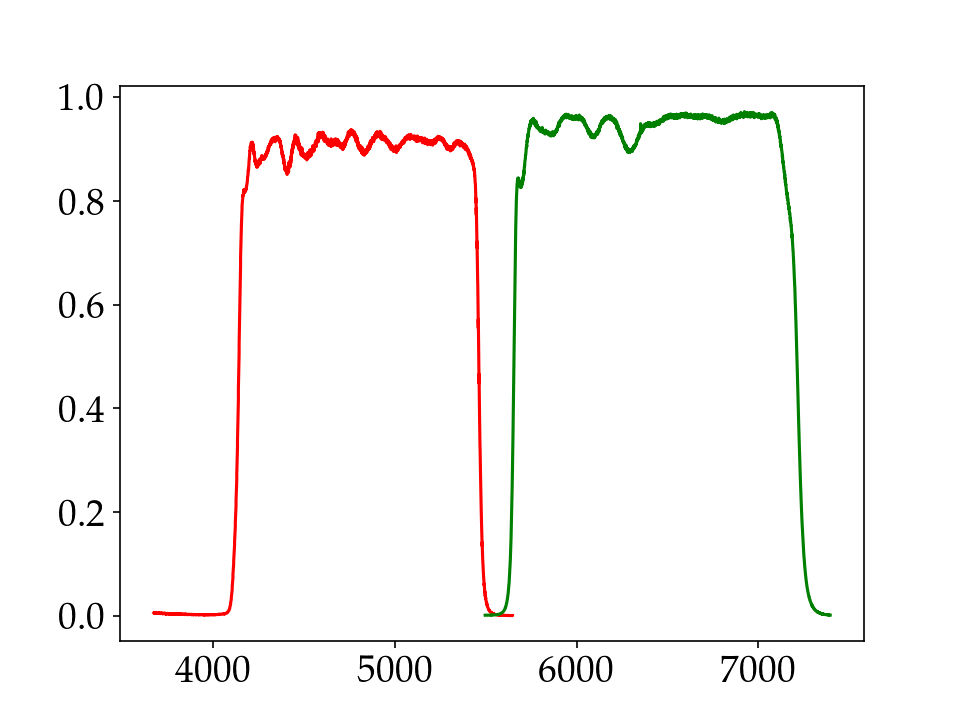

In [109]:
transfilt_ztfg = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/flasher/Palomar_ZTF_g.dat')
transfilt_ztfr = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/flasher/Palomar_ZTF_r.dat')

plt.figure()
plt.plot(transfilt_ztfg['col1'],transfilt_ztfg['col2'], color = 'r')
plt.plot(transfilt_ztfr['col1'],transfilt_ztfr['col2'], color = 'g')

In [206]:
def SynPhot(wl,flux, transmission_filter,ret_flux=False):
    
    '''
    this function computes the synthetic photometry from a spectrum in the filter of your choice 
    for the mag_system ='AB' ONLY (I removed the vega system)
    
    parameters
    ----------
    wl       [array]  AA 
    flux     [array] **input should be in which unit? erg/cm-2/s/AA
    transmission_filter   []      transmission curve (from SVO)
    
    returns
    -------
    ##normalised (AB mag) flux, and 
    
    magnitude in AB mag
    
    '''   
   
    ZPflux     = 3631         # AB flux Zero point value
    ZPflux     = ZPflux*1e-23 # to Janskyni
    ZPflux_vec = ZPflux*c.value*(wl**(-2))*1e10 # To janskini but in angstromi

    T_filt_interp = np.interp(wl , transmission_filter["col1"], transmission_filter["col2"],
                              left=0,right=0)

    trans_flux    = np.trapz(flux * T_filt_interp, wl) ## THE actual flux, 
    
    norm_flux     = np.trapz(ZPflux_vec * T_filt_interp , wl) ## FROM THE ZERO point, so that's the normalisation
    
    mag = -2.5*np.log10(trans_flux/norm_flux)
     
    if ret_flux == True:
        return trans_flux,norm_flux 
    
#     return trans_flux/norm_flux, mag  
    return mag  

In [184]:
def blackebody(lam,T): 
    '''
    
    parameters
    ----------
    lam     [array] of wavelengths in Ångstroms
    T       [float] temperature in Kelvins
    
    returns
    -------
    BB fluc in erg/s/cm2/A
    
    '''
    
    c_   = 2.99*(10**10)    # cm/s
    h_   = 6.63*(10**(-27)) # erg.s
    k_b_ = 1.38*(10**(-16)) # erg/K
    
    
    bb_flux = (2*h_*(c_**2)/(lam**5)) * (1 / (np.exp((h_ * c_)/(lam * k_b_ * T)) - 1))

    return bb_flux

In [202]:
temperatures = np.arange(6000,500000,500)

In [203]:
temperatures

array([  6000,   6500,   7000,   7500,   8000,   8500,   9000,   9500,
        10000,  10500,  11000,  11500,  12000,  12500,  13000,  13500,
        14000,  14500,  15000,  15500,  16000,  16500,  17000,  17500,
        18000,  18500,  19000,  19500,  20000,  20500,  21000,  21500,
        22000,  22500,  23000,  23500,  24000,  24500,  25000,  25500,
        26000,  26500,  27000,  27500,  28000,  28500,  29000,  29500,
        30000,  30500,  31000,  31500,  32000,  32500,  33000,  33500,
        34000,  34500,  35000,  35500,  36000,  36500,  37000,  37500,
        38000,  38500,  39000,  39500,  40000,  40500,  41000,  41500,
        42000,  42500,  43000,  43500,  44000,  44500,  45000,  45500,
        46000,  46500,  47000,  47500,  48000,  48500,  49000,  49500,
        50000,  50500,  51000,  51500,  52000,  52500,  53000,  53500,
        54000,  54500,  55000,  55500,  56000,  56500,  57000,  57500,
        58000,  58500,  59000,  59500,  60000,  60500,  61000,  61500,
      

<IPython.core.display.Javascript object>


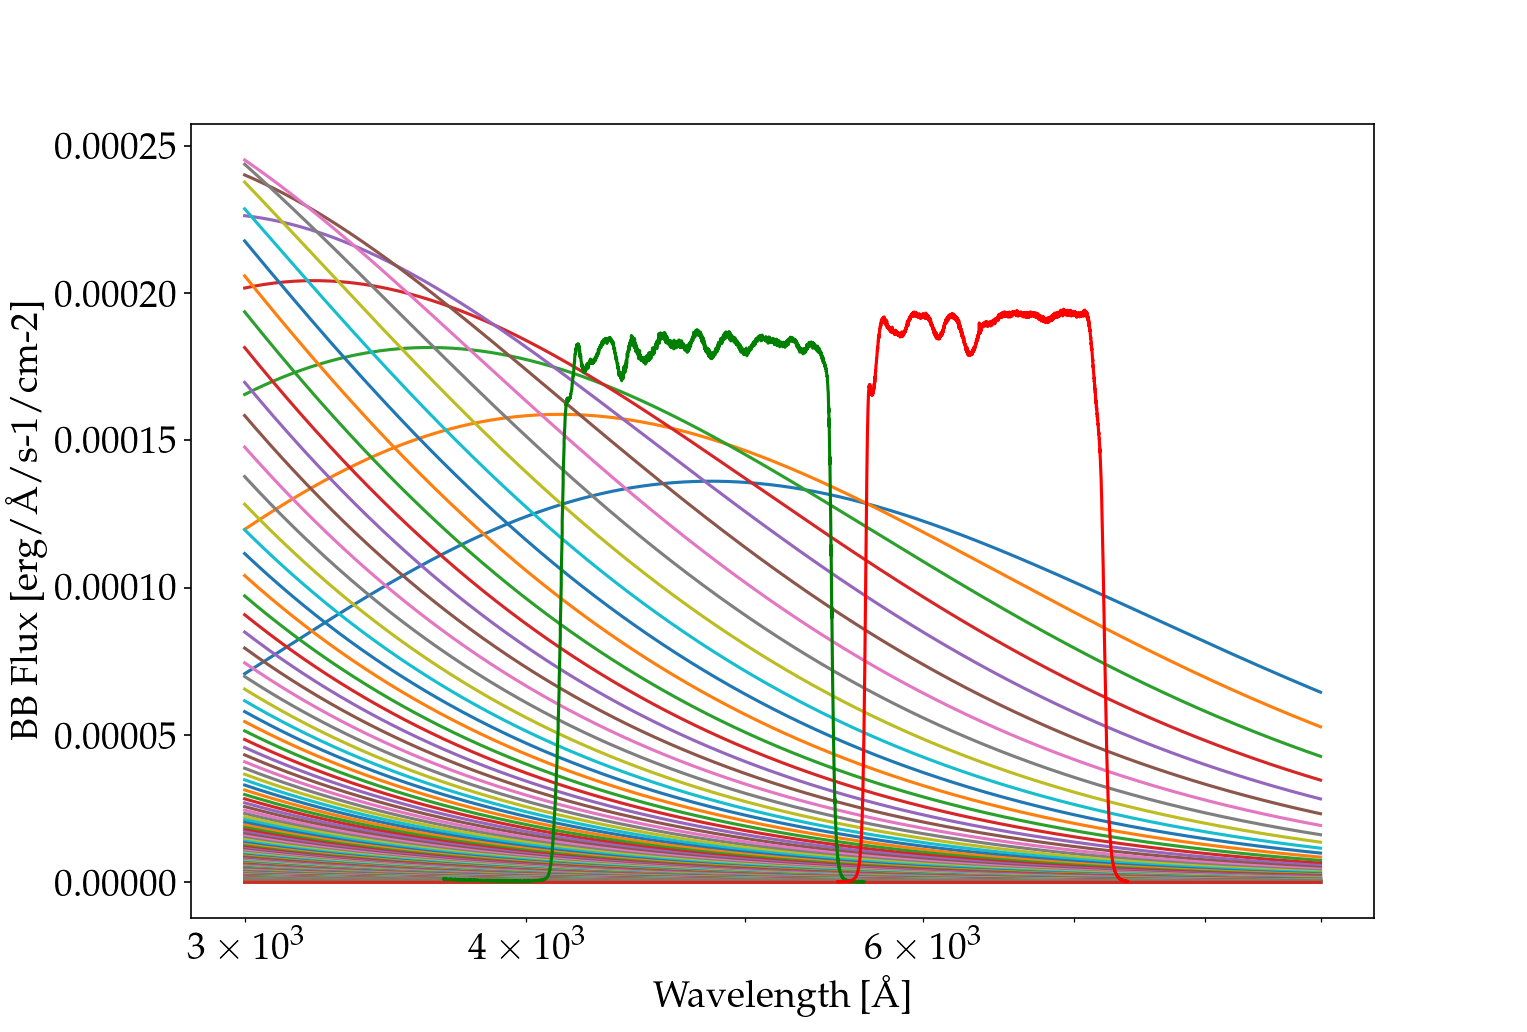

Text(0, 0.5, 'BB Flux [erg/Å/s-1/cm-2]')

In [216]:
color = []


with quantity_support():
    plt.figure()
   
    myBool = True
    for temp in temperatures:
    
        bb_   = BlackBody1D(temperature=temp*u.K)
        wav_  = np.linspace(3000, 9000,800) * u.AA
        flux_ = bb_(wav_).to(FLAM, u.spectral_density(wav_)) 
        
        if myBool is True:
            plt.semilogx(wav_, flux_)
        myBool= not myBool
        
        g_    = SynPhot(wav_.value,flux_.value,transfilt_ztfg)
        r_    = SynPhot(wav_.value,flux_.value,transfilt_ztfr)
        
        color.append(g_-r_)
    plt.plot(transfilt_ztfg['col1'],0.2*transfilt_ztfg['col2']*10**(-3), color = 'g')
    plt.plot(transfilt_ztfr['col1'],0.2*transfilt_ztfr['col2']*10**(-3), color = 'r')
    
plt.xlabel('Wavelength [Å]', size = 18)
plt.ylabel('BB Flux [erg/Å/s-1/cm-2]', size = 18)

<IPython.core.display.Javascript object>


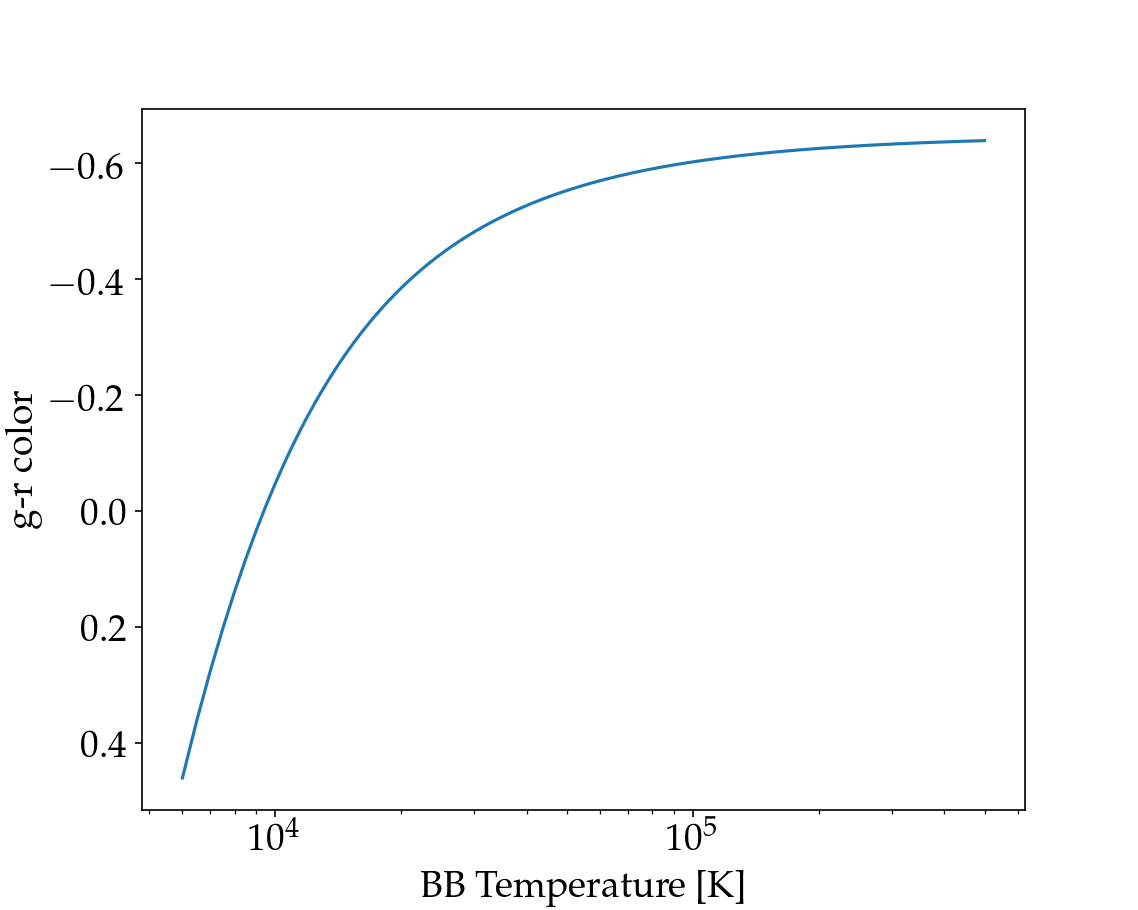

In [215]:
plt.figure()
plt.semilogx(temperatures, color)
plt.xlabel('BB Temperature [K]', size = 18)
plt.ylabel('g-r color', size = 18)

plt.gca().invert_yaxis()

In [194]:
# color = []



# plt.figure()
    
# #     plt.axvline(bb.lambda_max.to(u.AA).value, ls='--')

# for temp in temperatures:
    
#     wav_  = np.linspace(1000, 9000, 800 ) 
#     flux_ = blackebody(wav_,temp)
#     plt.plot(wav_, flux_)
    
#     g_    = SynPhot(wav_,flux_,transfilt_ztfg)
#     r_    = SynPhot(wav_,flux_,transfilt_ztfr)
    
#     color.append(g_-r_)


In [196]:
# plt.figure()
# plt.plot(temperatures, color)

# OLD CALCULATIONS : HST data and some old timescales

In [20]:
# fig0,ax0 = plt.subplots()

# # i = 0

# for _ in color_LC:
    
#     temptab = table_infants[table_infants['name']==_.split('_')[0]]
    
#     lc_r = eval(_)

#     if len(lc_r) != 0:
# #         label_  = _.split+' '+str(lc_r['g-r'][1])
#         ax0.errorbar(lc_r['t_frompeakg'] 
#                                                    , lc_r['g-r'], lc_r['e_g-r'],
#                                                              fmt = 'o', ms = 2,alpha = 0.2)


            
#     ax0.set_ylabel('g-r', size = 15)
# #     ax3.set_ylabel('Absolute Magnitude', size = 15)

# plt.xlabel('Days Peak g', size = 15)
# plt.xlim([-10,2])

# # plt.legend()
# plt.gca().invert_yaxis()

In [23]:
name_check_HST_prop = ['ZTF20acedqis', 'ZTF19acryurj', 'ZTF20ablygyy', 'ZTF20abxyjtx']

In [29]:
vstack([x for x in table_infants if x['name'] in name_check_HST_prop])['name', 'jd_t_exp'].show_in_browser()

In [31]:
for _ in name_check_HST_prop: 
#     print(_)
    color     = _ + '_colorev'
    
    try: 
        globals()[color] = ascii.read(color_lc+_+'_fullLC_colorev.csv', delimiter=',')
    except FileNotFoundError:
        print(f'No color LC for {_}')
        
    

color_LC = [ x for x in globals() if str(x).startswith('ZTF') ]




No color LC for ZTF20abxyjtx


In [32]:
name_col_HST_prop = ['ZTF20acedqis', 'ZTF19acryurj', 'ZTF20ablygyy']

<IPython.core.display.Javascript object>


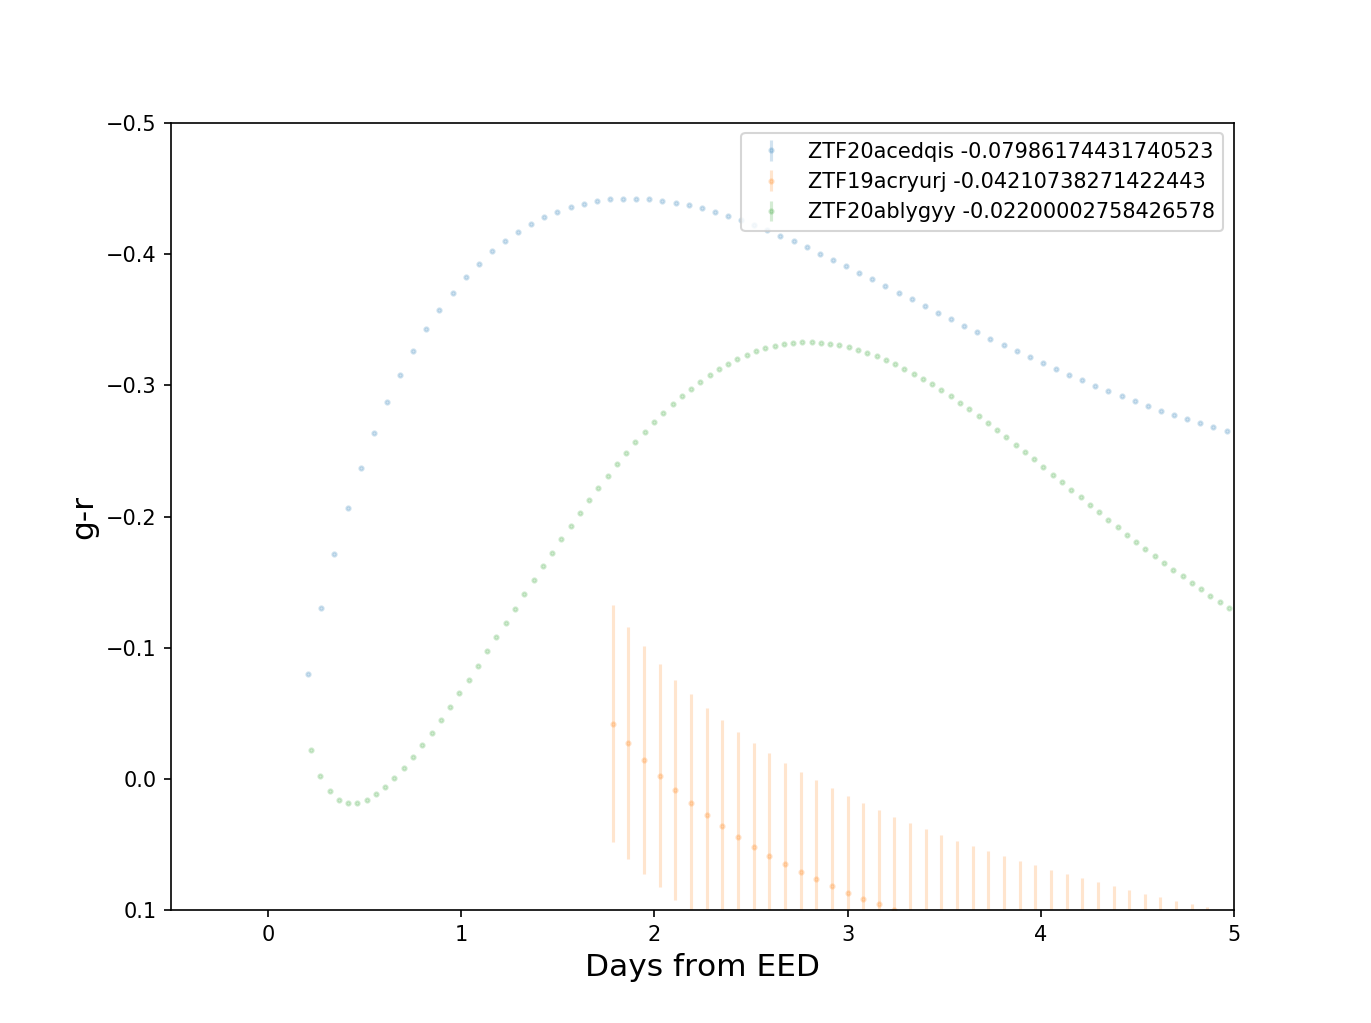

In [36]:
fig0,ax0 = plt.subplots()

# i = 0

for _ in name_col_HST_prop:
    
    temptab = table_infants[table_infants['name']==_]
    
    lc_r = globals().get(_+'_colorev')

    if len(lc_r) != 0:
        label_  = _+' '+str(lc_r['g-r'][1])
        globals()['rmagztfplot_'+_] = ax0.errorbar((lc_r['t_frompeakg'] + temptab['peakday_g'][0])*(1+temptab['redshift'][0])
                                                   , lc_r['g-r'], lc_r['e_g-r'],
                                                             fmt = 'o', ms = 2,alpha = 0.2, label = label_)


            
    ax0.set_ylabel('g-r', size = 15)
#     ax3.set_ylabel('Absolute Magnitude', size = 15)

plt.xlabel('Days from EED', size = 15)
plt.xlim([-0.5,5])
plt.ylim([-0.5,0.1])

plt.legend()
plt.gca().invert_yaxis()